# Исследование продаж игр интернет-магазина

##  Описание проекта и исходные данные
**Цель :  на основе предоставленных данных провести исследовательский анализ данных и получить ответы на перечень поставленных задач:**

*1 этап. Подготовить данные для исследования:*
- Заменить названия столбцов (приведите к нижнему регистру);
- Преобразовать данные в нужные типы;
- Обработать пропуски и при необходимости:
  1. Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
  2. Описать причины, которые могли привести к пропускам;
  3. Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать его обработку.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

*2 этап. Исследовательский анализ данных*
- Изучить, сколько игр выпускалось в разные годы. Сделать вывод о важности всех периодов.
- Изучить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Изучить данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Исследовать какие платформы лидируют по продажам, растут или падают? Выбрать потенциально прибыльные платформы.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Выводы.
- Соотнести выводы с продажами игр на других платформах.
- Изучить общее распределение игр по жанрам. Сделать вывод о самых прибыльных жанрах? Выделить жанры с высокими и низкими продажами.

*3 этап. Составление портрета пользователя каждого региона*
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опистаь различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияение рейтинга ESRB на продажи в отдельном регионе.

*Общий вывод*



## Описание данных

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные представлены до 2016 года. Необходимо спрогно
Перед нами данные до 2016 года. В ходе работы мы спрогнозируем продажи на 2017год
 - ```Name``` — название игры
 - ```Platform```— платформа
 - ```Year_of_Release``` — год выпуска
 - ```Genre``` — жанр
 - ```NA_sales``` — продажи в Северной Америке (миллионы проданных копий)
 - ```EU_sales``` — продажи в Европе (миллионы проданных копий)
 - ```JP_sales``` — продажи в Японии (миллионы проданных копий)
 - ```Other_sales``` — продажи в других странах (миллионы проданных копий)
 - ```Critic_Score``` — оценка критиков (максимум 100)
 - ```User_Score``` — оценка пользователей (максимум 10)
 - ```Rating``` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


In [1]:
!pip install jupyter-black

     |████████████████████████████████| 1.8 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.0 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [2]:
# помощник писать код красиво
import jupyter_black

jupyter_black.load()

# необходимые библиотеки
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from matplotlib.colors import (
    LinearSegmentedColormap,
)  # поможет расскарсить датафрейм

# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)

In [3]:
# улучшение четкости изображения графиков
%config InlineBackend.figure_format = 'retina'

In [4]:
try:
    data = pd.read_csv("datasets/games.csv", sep=",")
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv", sep=",")

display(data.head(6))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# обработаем копию датасета чтобы работать с ней, а не с оригинальной таблицей
df = data.copy()
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# привычный формат отображения чисел
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


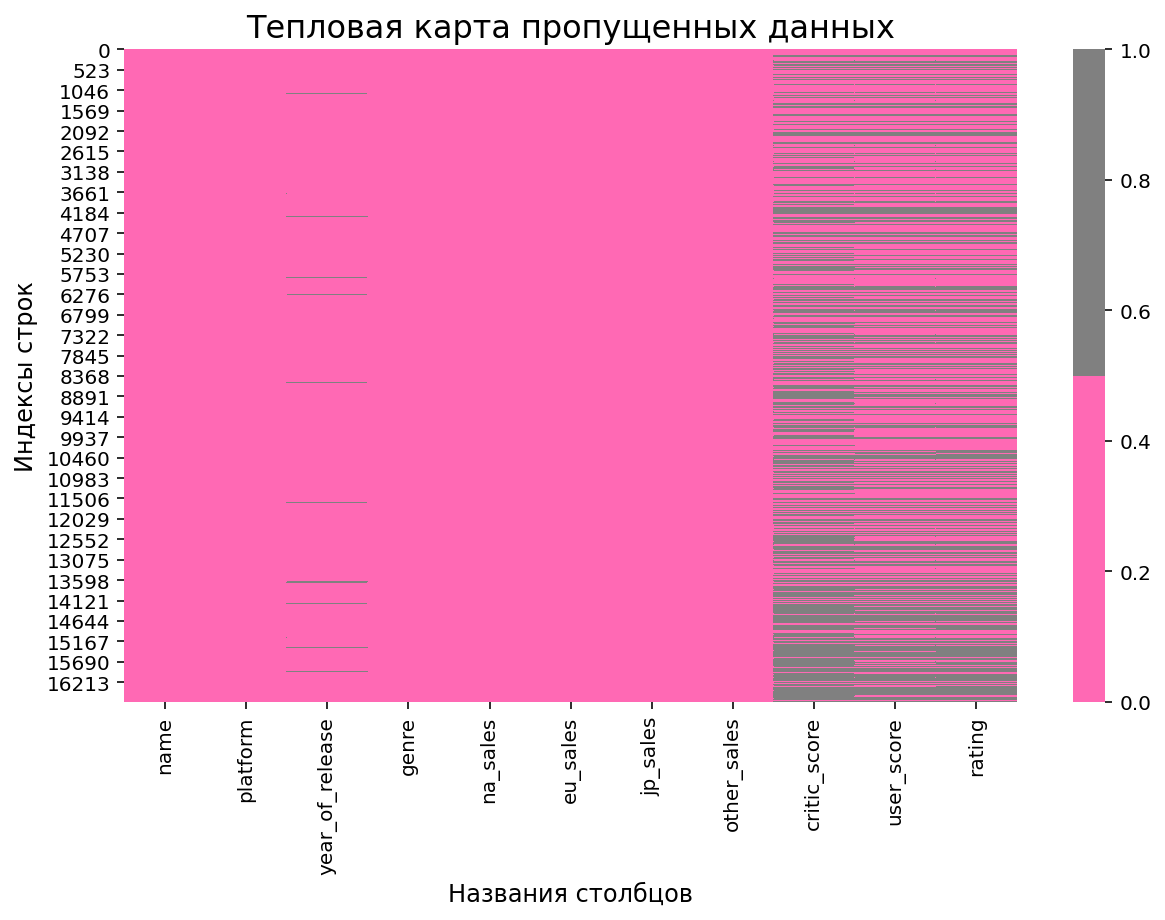

In [6]:
cols = df.columns
# определяем цвета
# Серый - пропущенные данные, розовый - не пропущенные
colours = ["#ff69b4", "#808080"]
# Настройка размера графика
plt.figure(figsize=(10, 6))
# Создание тепловой карты пропущенных данных
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), cbar=True)
# Добавление заголовка и меток осей
plt.title("Тепловая карта пропущенных данных", fontsize=16)
plt.xlabel("Названия столбцов", fontsize=12)
plt.ylabel("Индексы строк", fontsize=12)
plt.show()

In [7]:
# для каждого столбца найдем процент пропущенных значений
for col in df.columns:
    missing_percentage = df[col].isnull().mean() * 100
    print("{} - {}%".format(col, round(missing_percentage)))

name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 40%
rating - 40%


**Вывод:** Изучив первоначальные данные делаем вывод что среди 16 715 записей о выпущенных играх есть столбцы с разным количеством пропусков в данных, в том числе гже пропусков половина - ```critic_score```. В некоторых столбцах, например ```user_score ```  присутсвует некорректный тип данных. Для проведения исследования требуется провести предобработку в соответвии с задачами.

### Предобработка данных

#### Приведение типов данных


In [8]:
# заменим тип данных, оставляя пропуски в столбце
df[["year_of_release", "critic_score"]] = df[
    ["year_of_release", "critic_score"]
].astype("Int64")

In [9]:
df["user_score"].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
1.5       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Среди числовых значений столбца ```user_score``` встречается строковая запись *tbd*. TBD означает «To Be Determined», то есть оценка будет определена позже. При первом рассмотрении, такая запись не пригодится при исследовании, поэтому для приведения к типу ```float``` заменим эту запись на пропуск из библиотеки *numpy*, запомнив что пропуск в этом случае означает отсутствие рейтинга у игры на момент сбора данных.

In [10]:
df["user_score"] = df["user_score"].replace("tbd", np.nan).astype("float64")
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Типы данных приведены в соответствие с логикой значений столбцов, теперь можно корректно производить исследования с помощью операций с данными одного типа и получать показательные выводы при визуализации

#### Обработка пропусков, дубликатов и аномалий

In [11]:
# удалим явные дубликаты  строк
df = df.drop_duplicates()

In [12]:
"""
функция принимает значение столбца df и выводит его описание для анализа, считает пропуски, уникальные значения ,
тип данных и строит диаграмму размаха для числовых типов данных
"""


def investigate_column(column):
    print("Кол-во Null и Na значений:", column.isna().sum())
    print("Кол-во уникальных значений:", column.nunique())
    print("Data type:", column.dtype)

    # Описание статистики
    print(column.describe())

    # Частота уникальных значений
    print("Частота уникальных значений столбца:\n", column.value_counts())

    # Минимальное и максимальное значение (для числовых данных)
    if pd.api.types.is_numeric_dtype(column) and not pd.api.types.is_bool_dtype(column):
        print("Minimum :", column.min())
        print("Maximum :", column.max())
        print("Quantiles:\n", column.quantile([0.25, 0.5, 0.75]))

        # Построение boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(
            column.dropna(), vert=False
        )  # Удаляем NaN для отображения и разворачиваем график
        plt.title(f"Диаграмма размаха для столбца")
        plt.xlabel("Значения")
        plt.show()
    else:
        pass

##### Обработка "name"

In [13]:
investigate_column(df["name"])

Кол-во Null и Na значений: 2
Кол-во уникальных значений: 11559
Data type: object
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
Частота уникальных значений столбца:
 Need for Speed: Most Wanted                     12
LEGO Marvel Super Heroes                         9
Madden NFL 07                                    9
Ratatouille                                      9
FIFA 14                                          9
                                                ..
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)       1
CSI: Deadly Intent - The Hidden Cases            1
Tom Clancy's Ghost Recon: Jungle Storm           1
Heart no Kuni no Alice: Wonderful Twin World     1
Naruto Shippuden: Dragon Blade Chronicles        1
Name: name, Length: 11559, dtype: int64


Названия игр имеют дубликаты, так как выходят на разных платформах. Такие дубликаты мы сразу не удаляем. Рассмотрим отдельно самую повторяющуюся игру:

In [14]:
# уберем пробелы в начале строк
df["name"] = df["name"].str.strip()
# уберем пропуски
df.dropna(subset=["name"], inplace=True)

In [15]:
# выведем значения столбца platform для игры
genres_for_game = df[df["name"] == "Need for Speed: Most Wanted"]["platform"]
genres_for_game

253       PS2
523       PS3
1190     X360
1591     X360
1998       XB
2048      PSV
3581       GC
5972       PC
6273     WiiU
6410       DS
6473      GBA
11715      PC
Name: platform, dtype: object

In [16]:
# выведем строки  сповторяющейся платформой
df.loc[[1190, 1591]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.50,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.50,T


Значения повторяются для разных годов выпуска, так как платформа XBOX360 сохраняла название в отличие от Play Station. Данные дубликаты корректны и на данном этапе их можно оставить. Предполагаем что для остальных дубликатов ситуация аналогична

##### Обработка "platform"

In [17]:
investigate_column(df["platform"])

Кол-во Null и Na значений: 0
Кол-во уникальных значений: 31
Data type: object
count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object
Частота уникальных значений столбца:
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [18]:
df["platform"] = df["platform"].str.strip()

**Вывод:** В датасете присутствуют предположительно игры старые или редкие. Они не окажут влияния на исследование, если нужно исключим их позже, когда будем исследовать периоды выпуска игр

##### Обработка "genre"

In [19]:
investigate_column(df["genre"])

Кол-во Null и Na значений: 0
Кол-во уникальных значений: 12
Data type: object
count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object
Частота уникальных значений столбца:
 Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [20]:
df["genre"] = df["genre"].str.strip()

##### Обработка "year_of_release"

Кол-во Null и Na значений: 269
Кол-во уникальных значений: 37
Data type: Int64
count   16,444.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64
Частота уникальных значений столбца:
 2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64
Minimum : 1980
Maximum : 2016
Quantiles:
 0.25   2,003.00
0.50   2,007.00
0.75   2,010.00
Name: year_of_release, dtype: object


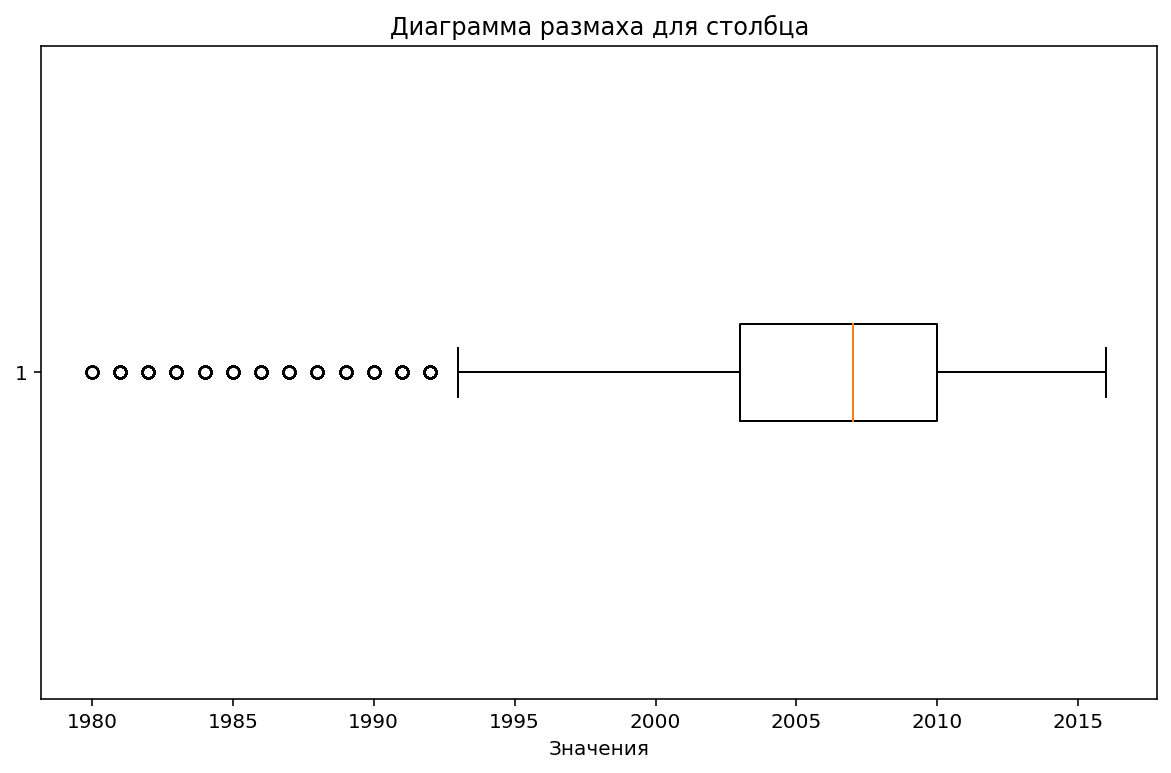

In [21]:
investigate_column(df["year_of_release"])

Из диаграммы размаха хорошо видно выбросы за 1.5IQR. Для нашего датасета удалим строки с играми до 1993 года: *2003 - (2010-2003)*1.5 = 1992.5* 

Дата выхода игры показательная характеристика для нашего исследования. Заполнить ее корректно мы не можем в моменте без сбора дополнительных сведений. Исходя из того что пропусков в этом столбце 2%, удалим эти строки, оставшиеся данные будут более точными.


In [22]:
df = df[df["year_of_release"] > 1992].reset_index(drop=True)

df.dropna(subset=["year_of_release"], inplace=True)

In [23]:
removed_percentage = (len(data) - len(df)) / len(data) * 100
print(f"Процент удалённых строк: {removed_percentage:.2f}%")

Процент удалённых строк: 3.45%


##### Обработка "critic_score" и "user_score"

В данных около половины пропущенных значений. Возьмем 2 самых распространенных кроссплатформенных игры и взглянем на пропуски 

In [24]:
df[df["name"] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
232,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.10,T
484,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1096,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.50,T
1470,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.50,T
1839,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.80,T
1887,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN
3349,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.10,T
5644,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.50,T
5926,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN
6057,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.10,E


In [25]:
df[df["name"] == "Madden NFL 07"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
221,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84,8.20,E
894,Madden NFL 07,X360,2006,Sports,1.66,0.00,0.01,0.13,80,6.00,E
1874,Madden NFL 07,XB,2006,Sports,0.97,0.03,0.00,0.03,83,8.70,E
3011,Madden NFL 07,GC,2006,Sports,0.48,0.13,0.00,0.02,82,9.20,E
3601,Madden NFL 07,PS3,2006,Sports,0.47,0.00,0.01,0.04,76,4.20,E
3760,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81,8.00,E
6987,Madden NFL 07,DS,2006,Sports,0.20,0.00,0.00,0.02,70,6.50,E
14351,Madden NFL 07,GBA,2006,Sports,0.02,0.01,0.00,0.00,68,9.30,E


In [26]:
# проверим, нет ли отрицательных значений в critic_score
len(df[df["critic_score"] < 0])

0

**Вывод:**  в полученных данных пропуски в столбцах `critic_score` , `user_score`, `rating` могут появляться одновременно. Как мы видим на двух примерах из датасета, даже один год выпуска игры, но на разных платформах имеет в случае с Madden NFL 07 различные оценки пользователей и критиков. Это говорит нам о том, что критерии оценок игр у критиков различные, и игровое сообщество разных платформ также по-разному оценивает одну и ту же игру. В связи с этим заполнять пропуски в столбцах с оценками считаю нецелесообразным, чтобы не искажать  исследование. Мы можем позже заполнить пропуски исходя из исследовательского анализа

**Вывод дополнительный**: Если нужно будет провести исследование конкретных игр, мы сможем заполнить пропуски для одинаковых нзваний игр, группируя их по году выпуска и использовав значения оценки для другой платформы.



<span style="color: blue;">**Вопрос для ревьюера:** Добрый день! Подскажите пожалуйста можно ли использовать в этом случае такой код, или лучше применить какой- то другой метод ? мне очень интересно мнение, так как чесались руки заполнить пропуски для платформы PS3 или PSV так как у них много продаж ```df['critic_score'] = df.groupby(['name', 'year_of_release'])['critic_score'].transform(lambda x: x.fillna(x.mean()))``` в этом случае понаддобилась бы замена еще типа данных на float </span>

##### Обработка "rating"

In [27]:
df["rating"].value_counts()

E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Согласно данным из открытых источников: https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi

Система ESRB - США, Мексика и Канада
- EC Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Назначим пропущенные значения рейтинга как *undefined*. К ней же отнесем игры с пометкой *RP*.  Категорию *AO* отнесем к *М*. 
Рейтинг *K-A* имеют более старые игры, изменим этот рейтинг на *E*

Эти допущения мы делаем в рамках исследования, так как логика групп идентична. 

In [28]:
df.loc[df["rating"] == "RP", "rating"] = "undefined"
df.loc[df["rating"] == "AO", "rating"] = "M"
df.loc[df["rating"] == "K-A", "rating"] = "E"
df["rating"].value_counts()

E            3924
T            2903
M            1536
E10+         1392
EC              8
undefined       1
Name: rating, dtype: int64

У двух популярных на разных платформах игр рейтинги на различных платформах совпадают, значит мы можем заполнить пропуски для всех таких игр наиболее часто повторяющимся значением. Если в группе не оказывается значений рейтинга, то значение остается без изменений.

In [29]:
# группируя одинаковые названия игр разных платформ по рейтингу чтобы найти моду и возьмем ее первое значение
# отсутствие вернет пропуск
df["rating"] = df.groupby(["name"])["rating"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

In [30]:
df[df["name"] == "Need for Speed: Most Wanted"].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
232,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.10,T
484,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,T


In [31]:
# заполним оставшиеся пропуски
df["rating"] = df["rating"].fillna("undefined")

##### Подсчет суммарных продаж всех регионов.

In [32]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52


In [33]:
removed_percentage = (len(data) - len(df)) / len(data) * 100
print(f"Процент удалённых строк: {removed_percentage:.2f}%")

Процент удалённых строк: 3.45%


**Вывод:**  В результате анализа первоначальных данных о выпущенных играх, мы выявили несколько ключевых аспектов, требующих внимания при дальнейшей работе с датасетом. 

- Во-первых, наблюдается наличие пропусков в столбцах с оценками, таких как `critic_score`, `user_score` и `rating`, что может негативно сказаться на качестве исследования. 
- Стоит также отметить, что в некоторых случаях, даже при одинаковом годе выпуска, разные платформы могут иметь различные оценки, что подчеркивает разнообразие критериев оценивания критиков и игрового сообщества, а также популярность разных платформ у разных возрастных категорий и социльаных категорий игроков (отсюда разные оценки). Это делает заполнение пропусков в этих столбцах нецелесообразным, так как это может привести к искажению данных и некорректным выводам.

- Данные приведены к типу, удобному для дальнейшего анализа
- После предобработки датасет пригоден для исследовательского и статистического анализа.

- Большое количество пропусков говорит о недостаточном сборе данных, либо об их отсутсвии у многих игр на момент формирования датасета. Для более точного анализа желательно актуализировать данные.

### Исследовательский анализ данных

#### Подсчет выпуска игр  в разные годы

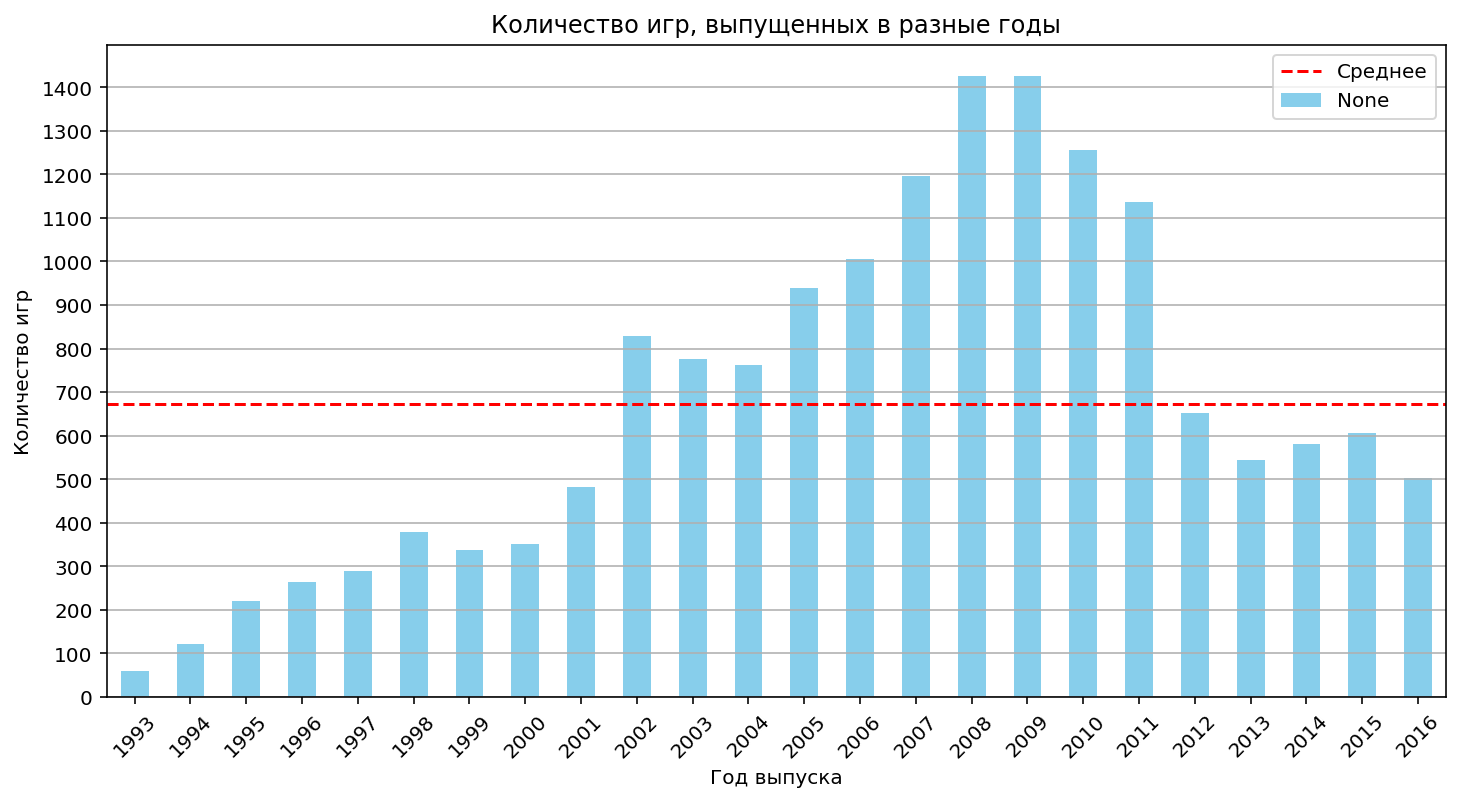

In [34]:
# сгруппируем по году выпуска и подсчитаем поличество строк для каждой группы
games_per_year = df.groupby("year_of_release").size()
# найдем среднее значение
mean_games = games_per_year.mean()
plt.figure(figsize=(12, 6))
games_per_year.plot(kind="bar", color="skyblue")
plt.axhline(mean_games, color="red", linestyle="--", label="Среднее")
plt.title("Количество игр, выпущенных в разные годы")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.xticks(rotation=45)
plt.yticks(range(0, 1500, 100))
plt.grid(axis="y")
plt.legend()
plt.show()

In [35]:
print(
    f"В среднем за период 1993-2016гг выпускалось порядка: {round(mean_games)} игр в год"
)

В среднем за период 1993-2016гг выпускалось порядка: 672 игр в год


**Вывод:**  
- Игровая индустрия сильно развилась в период с 1993-2003гг, выпуск игр вырос почти в 10 раз . Это связано с появлением новых платформ и распространение их и среди разных возрастных групп. 
- Рост продолжился линейно до 2008 г включительно. Пик выпуска новых игр пришелся на 2008-2009г. Затем наметился спад в выпуске новых игр. С 2011 до 2012 году и падение резко ускорилось и затем остановилось на уровне 500-600 игр в год.
- Сама по себе динамика роста показывает что с развитием технологий и появлением новых платформ количество игр увеличивалось кратно. Когда рынок платформ оформился появление новых игр резко замедлилось и установилось на уровне среднегодовых значений. 
- Из визуализации можно предположить что даже данные в за годы идущие друг за друго могут отличаться, так как игровая индустрия может очень стремительно развиваться с появалением новой платформы/технологии

#### Изучение продаж по платформам и срок жизни платформ

In [36]:
# построим сводную таблицу, проссумируя значения total_sales для всех платформ
platform_by_sales = pd.pivot_table(
    data=df, index="platform", values="total_sales", aggfunc="sum"
)
platform_by_sales.nlargest(10, "total_sales")

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Лидируют платформы Play Station 2 и XBOX360. Вышедшие позже и более современные платформы PS3 и PS4 пока отстают по продажам. Платформа PS потеряла актуальность и продажи в какой то момент остановились, передав эстафету следующему поколению платфом.

In [37]:
# передадим индексы series  в список
top_platforms = platform_by_sales.nlargest(10, "total_sales").index.tolist()

sales_by_year_and_platform = df[df["platform"].isin(top_platforms)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

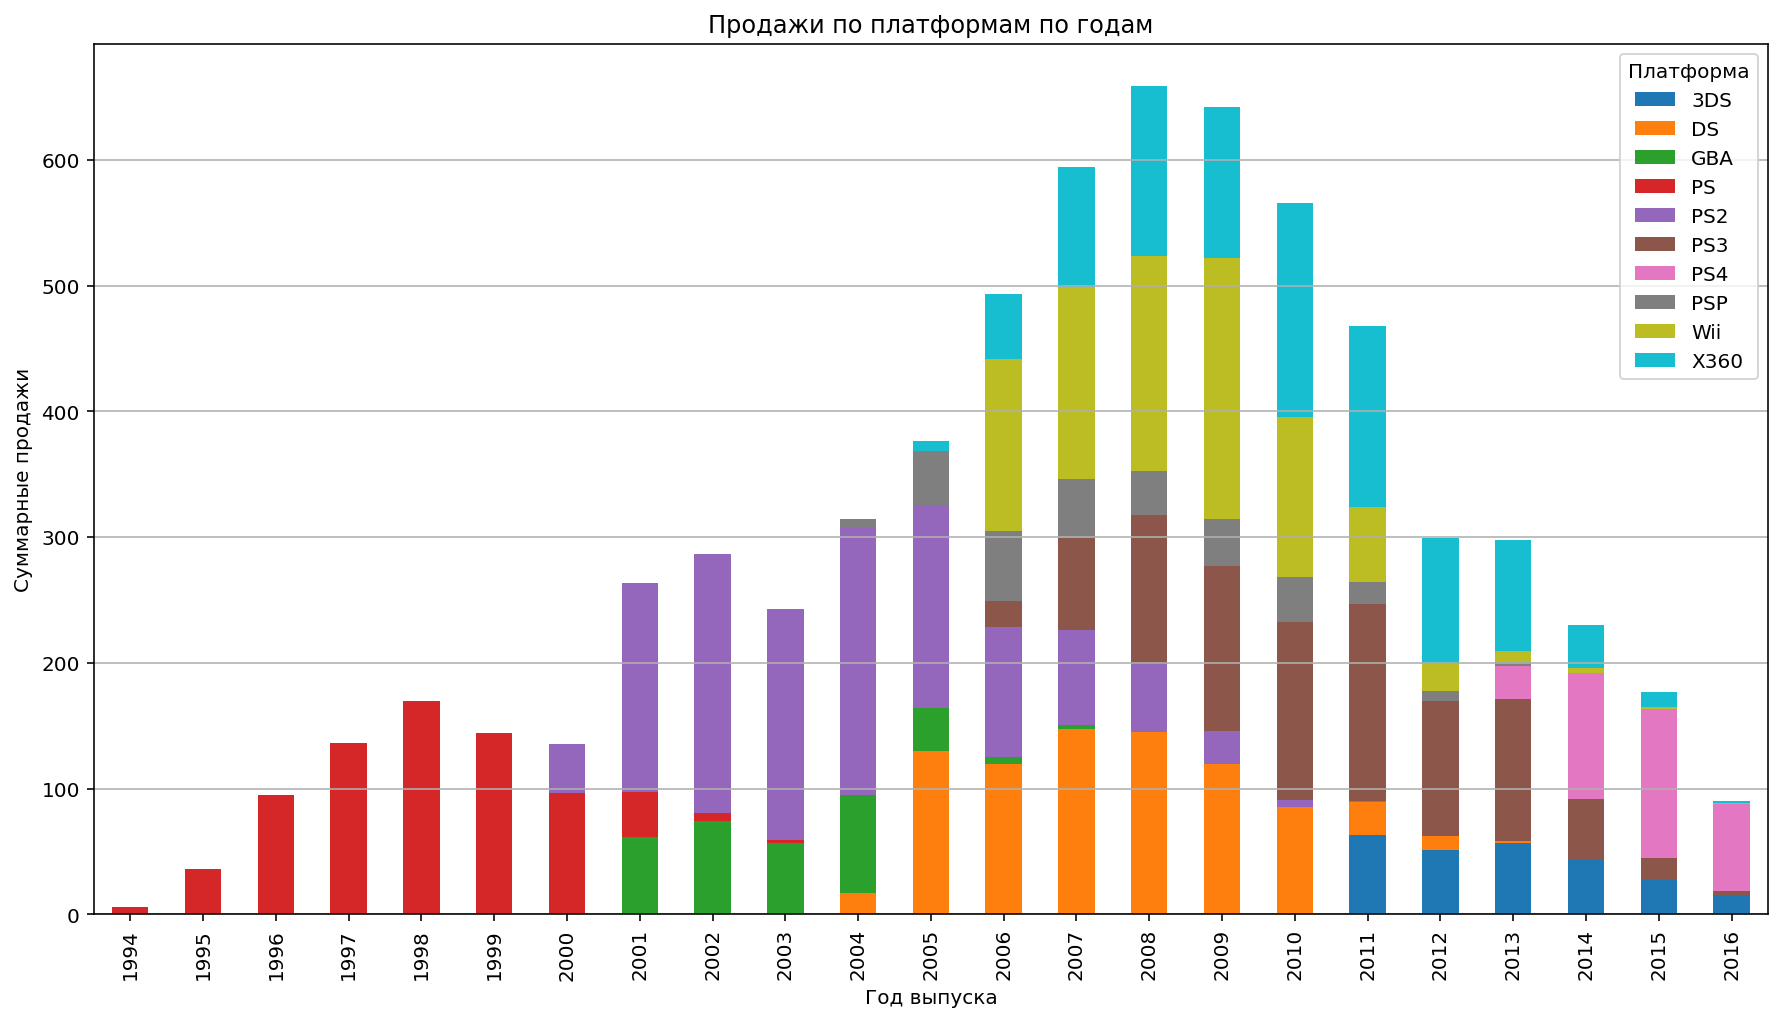

In [38]:
sales_by_year_and_platform.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.title("Продажи по платформам по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.legend(title="Платформа")
plt.grid(axis="y")
plt.show()

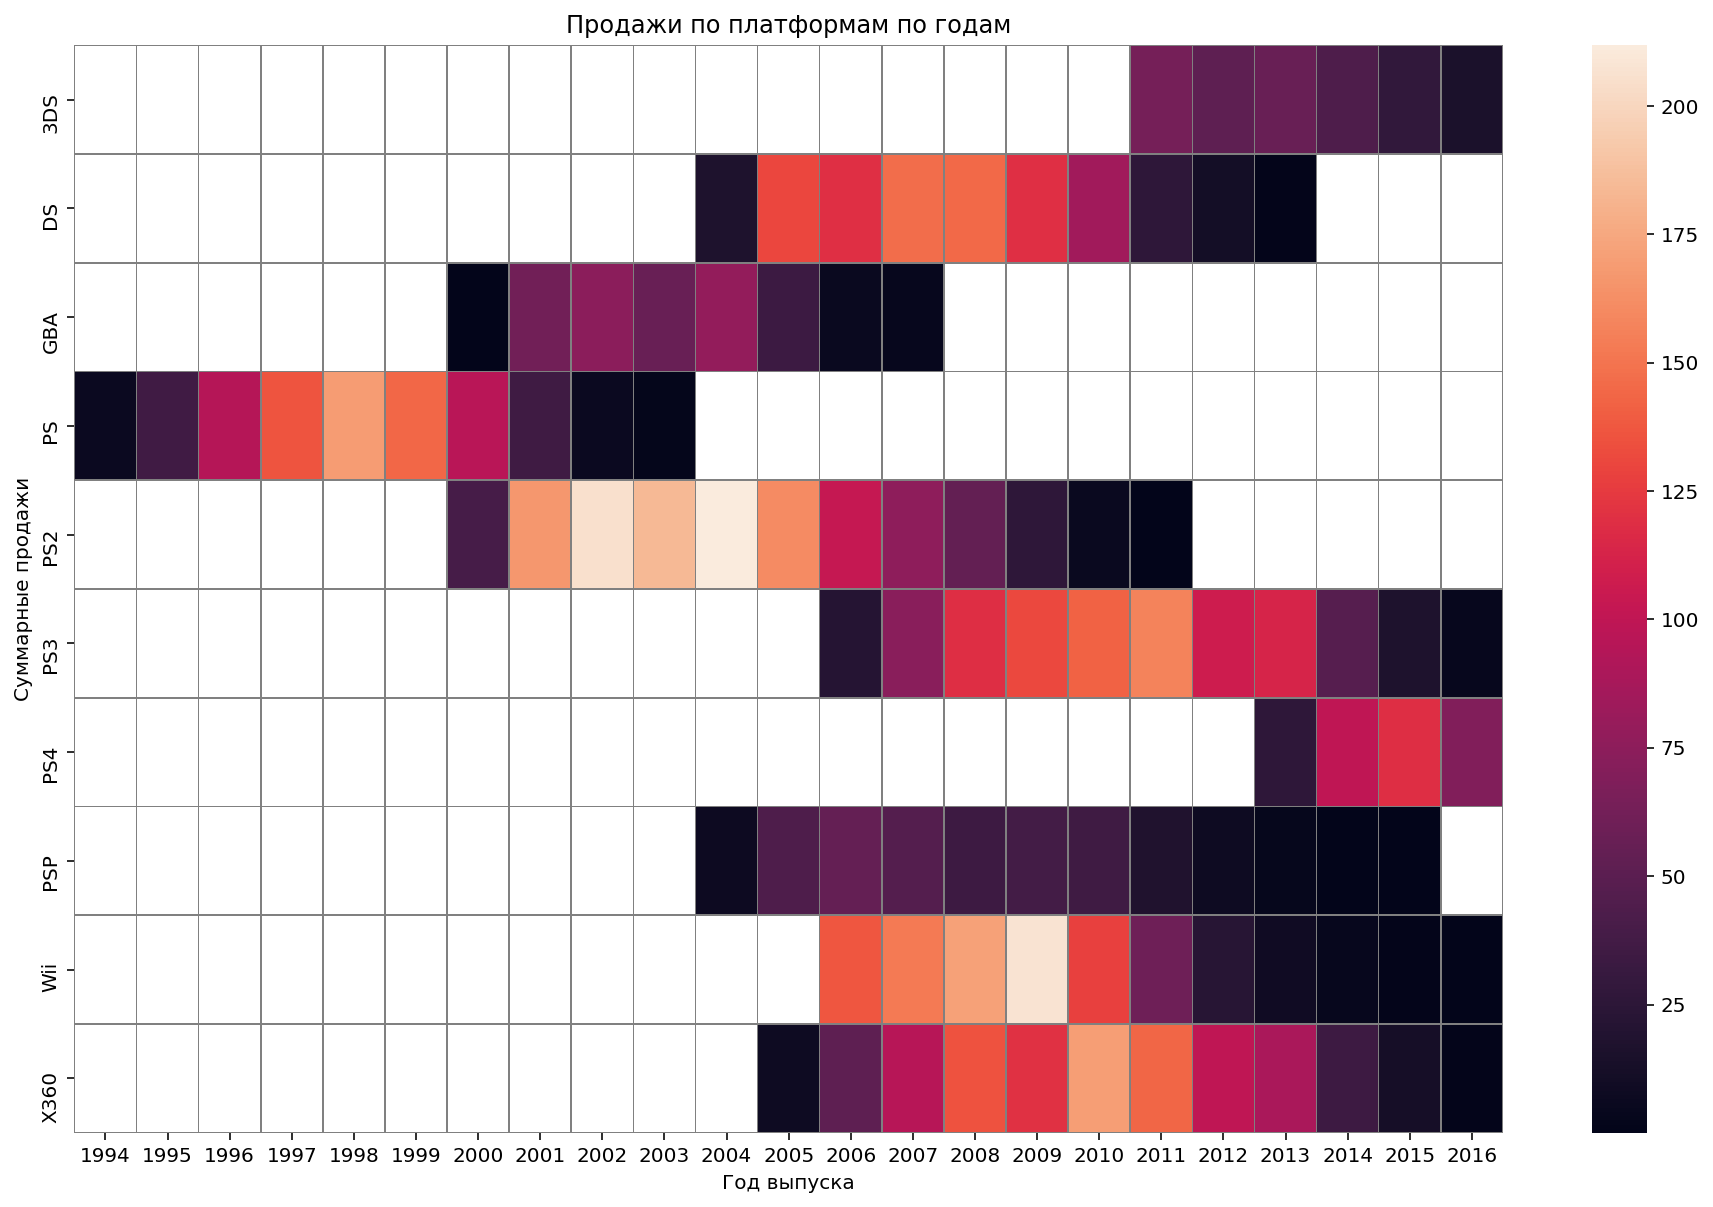

In [39]:
# построим таблицу для тепловой карты продаж , где индексами будут платформы
sales_for_heatmap = df[df["platform"].isin(top_platforms)].pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)
plt.figure(figsize=(16, 10))  # Настройка размера фигуры
sns.heatmap(data=sales_for_heatmap, linewidths=0.3, linecolor="grey")

plt.title("Продажи по платформам по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.show()

Из столбчатой диаграммы видно что средний срок выхода игр на платформу с момента ее появления - 8 лет. На наиболее удачные и популярные платформы PS2 и XBOX360 игры выходили целых 10 лет с момента появления.

<span style="color: blue;">**Вопрос для ревьюера:** Подскажите пожалуйста, какая визуализация из 2х для этого вопроса лучше подойдет для представления данных в реальной работе. Или может другой вариант?</span>

#### Выбор актуального периода исследования


Изучим отдельно продажи на одной из самых популярных платформ PS2

In [40]:
# построим сводную таблицу только для продаж ps2
ps2_sales = df[df["platform"].isin(["PS2"])].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

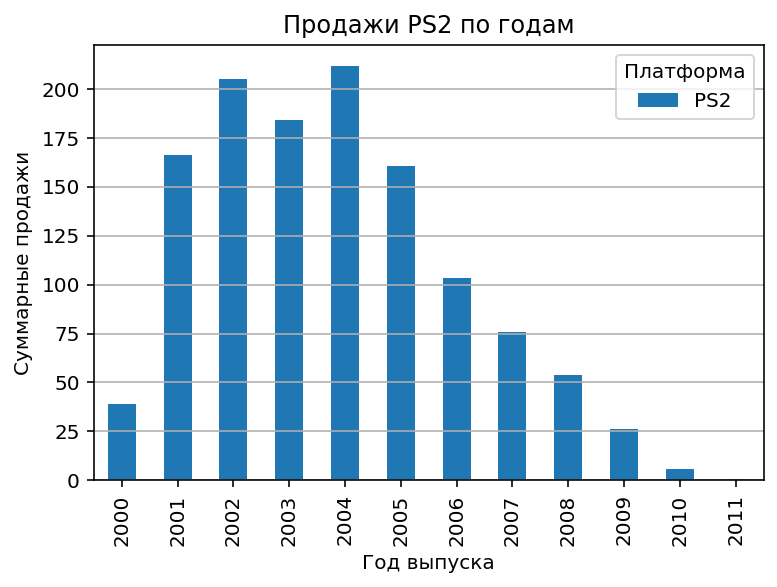

In [41]:
ps2_sales.plot(kind="bar")
plt.title("Продажи PS2 по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи")
plt.legend(title="Платформа")
plt.grid(axis="y")
plt.show()

За 10 летний период существования платформы она за 3 года вышла на пик продаж и затем 3 через еще 3 года начался период спада. Последние 3 года жизни платформы продажи игр на нее значительно меньше, чем у вновь появившихся конкурентов.

На этом графике в  пункте 2.2.2 [Перейти к изучению продаж по платформам](#изучение-продаж-по-платформам-и-срок-жизни-платформ) мы видим что в 2009 году, когда продажи PS2 приближались к своим минимумам, конкруренты XBOX360, PS3 и NINTENDO WII показывали свои лучшие продажи на пике. 

**Вывод:**  
    Из первичного исследовательского анализа мы можем сделать следующие выводы:
        
- Средний срок жизни платформы -8 лет, бывают платформы, которые развиваются и идут на спад быстрее, например платформа GBA
        
- Специфика данной отрасли - в том что она сильно зависит от технологических разработок в индустрии чипсетов и видеокарт, любой прорыв и вывод нового поколения платформы на рынок может резко изменить структуру рынка буквально за 1-2  года и продажи для платформ более старого поколения существенно просядут. 
- Исходя из этого, для прогнозирования продаж на 2017 год и осуществления предзаказа игр актуальным периодом для исследования выберем данные за период 2014-2016 гг (3 календарных года). Более старые данные могут помочь в исследовании рейтингов игр разных жанров и предпочтений пользователей разных возрастов и регионов в жанрах, но данные по платфлормам нужны только близкие к текущему периоду

#### Исследование платформ по продажам и  выбор потенциально прибыльных платформ.

In [42]:
df_actual = df[df["year_of_release"] > 2013]
df_actual.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8718,Pro Evolution Soccer 2015,X360,2014,Sports,0.05,0.08,0.00,0.01,<NA>,6.80,E,0.14


In [43]:
# считаем для каждой платформы суммарные продажи
sales_actual = (
    df_actual.pivot_table(index="platform", values="total_sales", aggfunc="sum")
    .sort_values("total_sales", ascending=False)
    .fillna(0)
)
sales_actual.head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


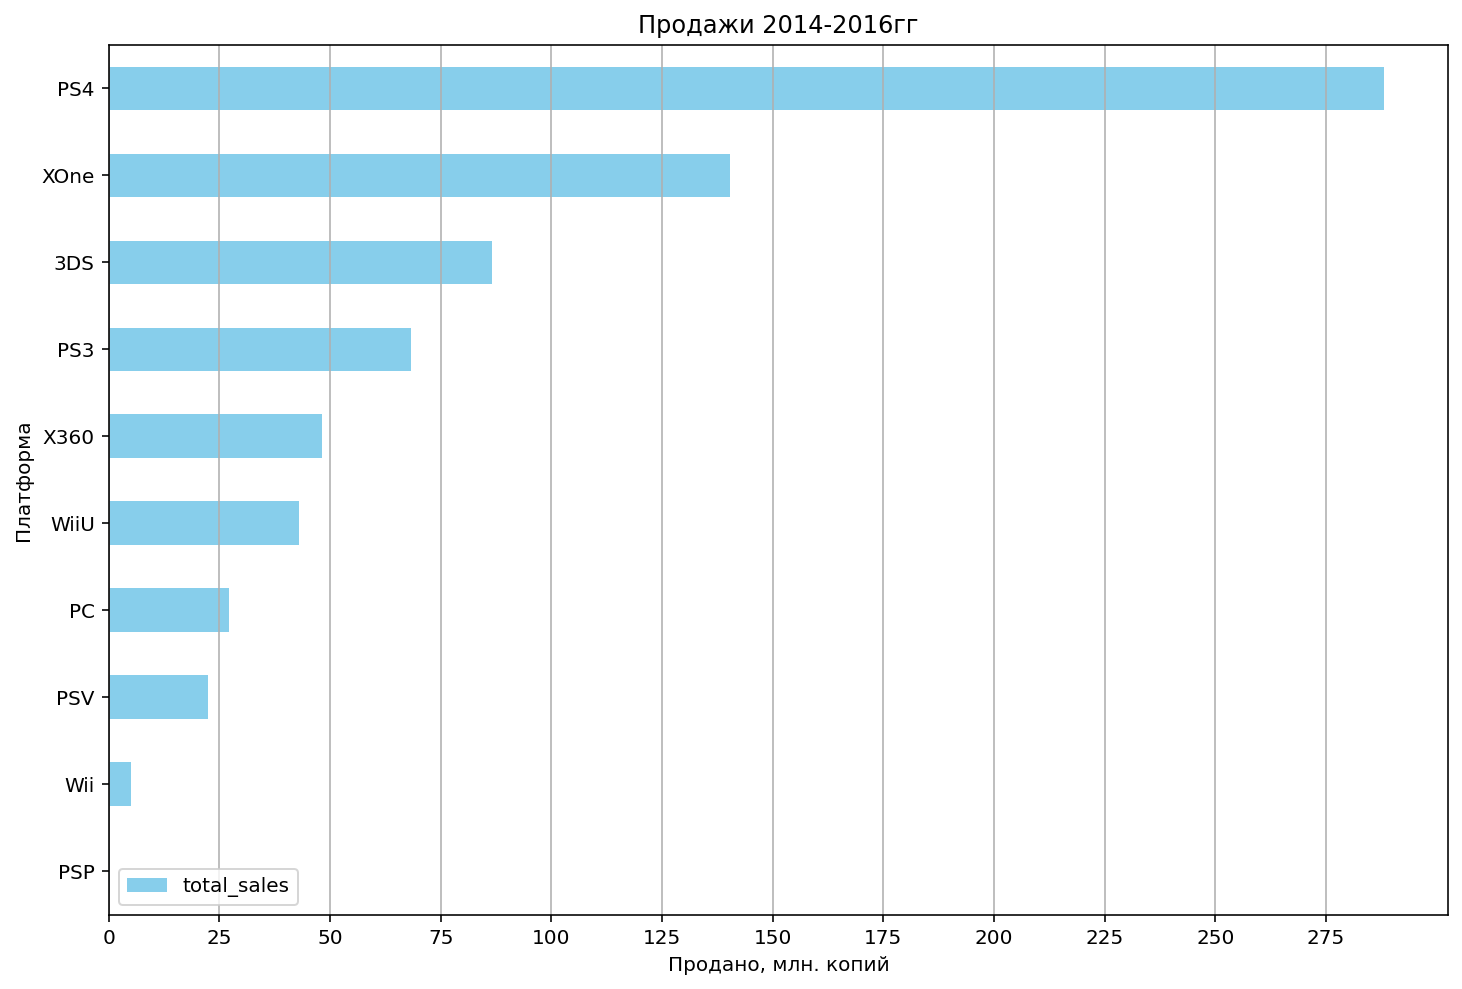

In [44]:
sales_actual.sort_values(by="total_sales", ascending=True).plot(
    kind="barh", figsize=(12, 8), color="skyblue"
)
plt.title("Продажи 2014-2016гг")
plt.xlabel("Продано, млн. копий")
plt.ylabel("Платформа")
plt.grid(axis="x")
plt.xticks(range(0, 300, 25))
plt.show()

За актуальный период мы видим явное преимущество в продажах игр для PS4. На втором месте XONE, прямой конкруент PS4. При этом на третьем месте находится Портативная платформа 3DS, на нее нужно обратить внимание, исследовав продажи по годам, так как за актуальный период он а опережает даже популярные платформы  PS3  и XBOX360. Платформы Wii и PSP показывают самые низкие продажи.

In [45]:
platforms_actual = (
    df_actual.groupby(["platform", "year_of_release"])["total_sales"]
    .sum()
    .fillna(0)
    .reset_index()
)

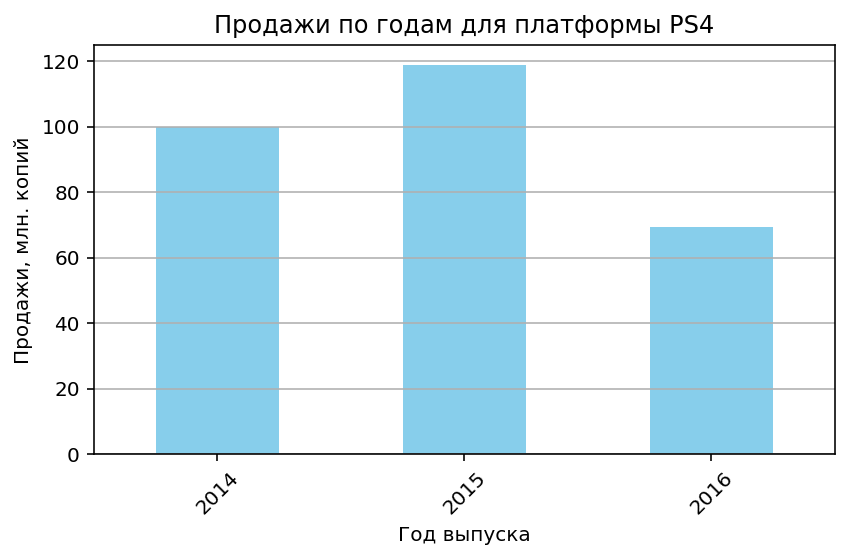

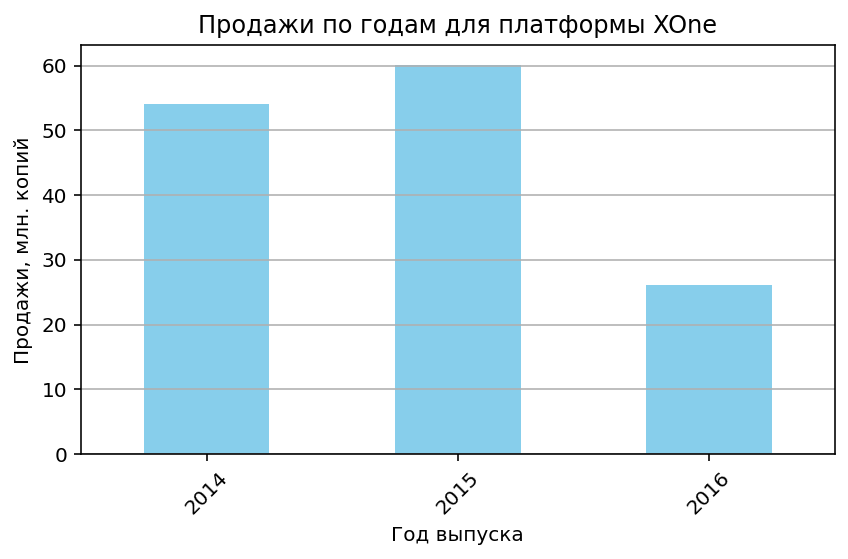

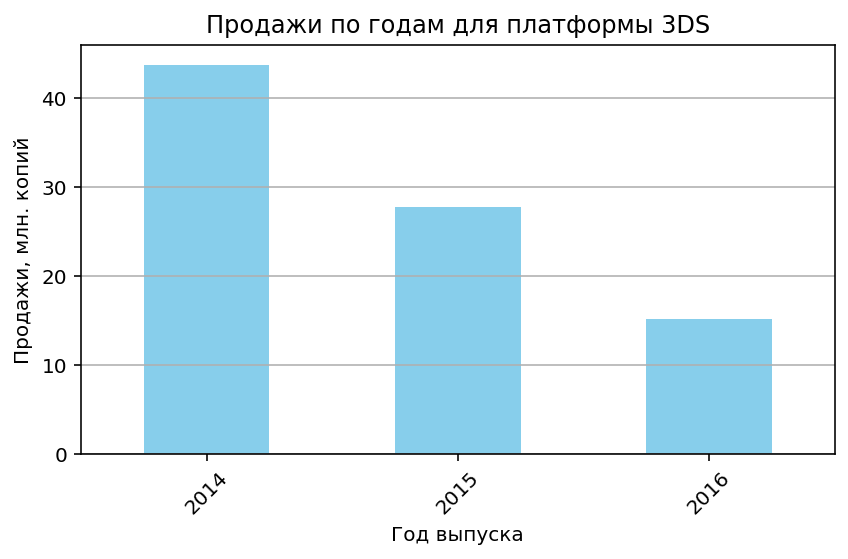

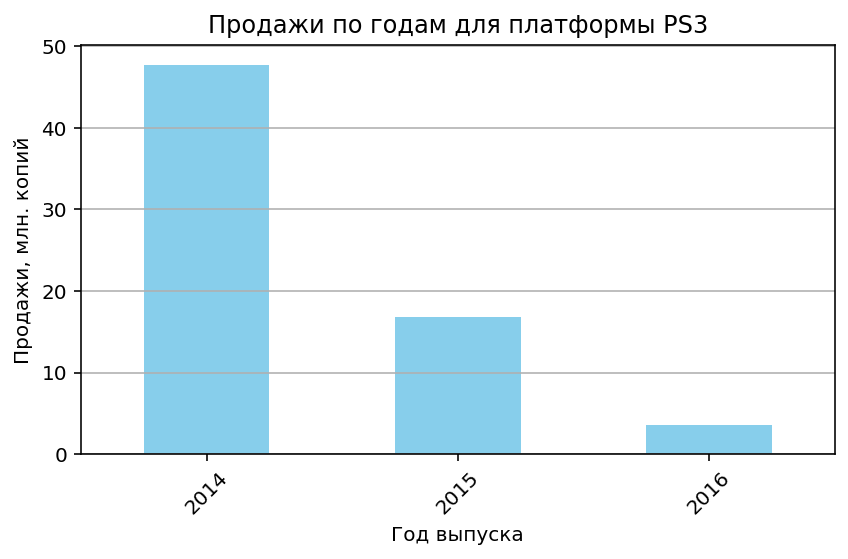

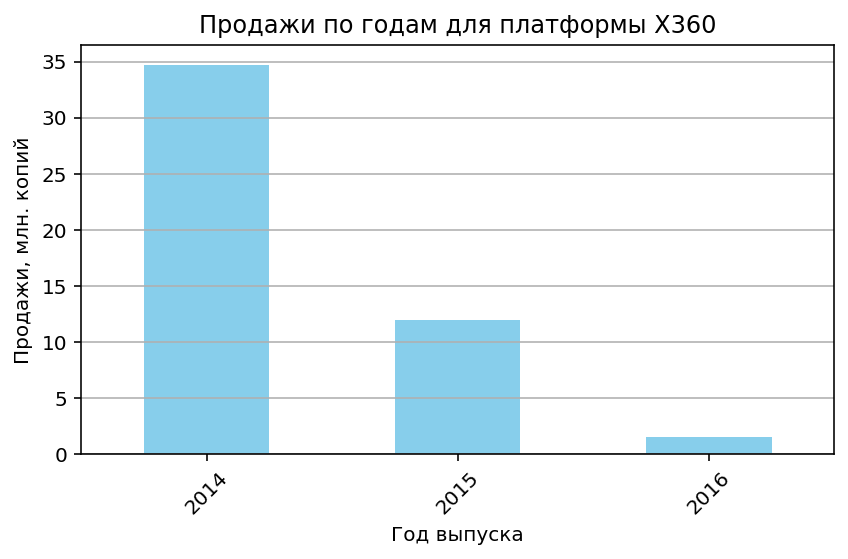

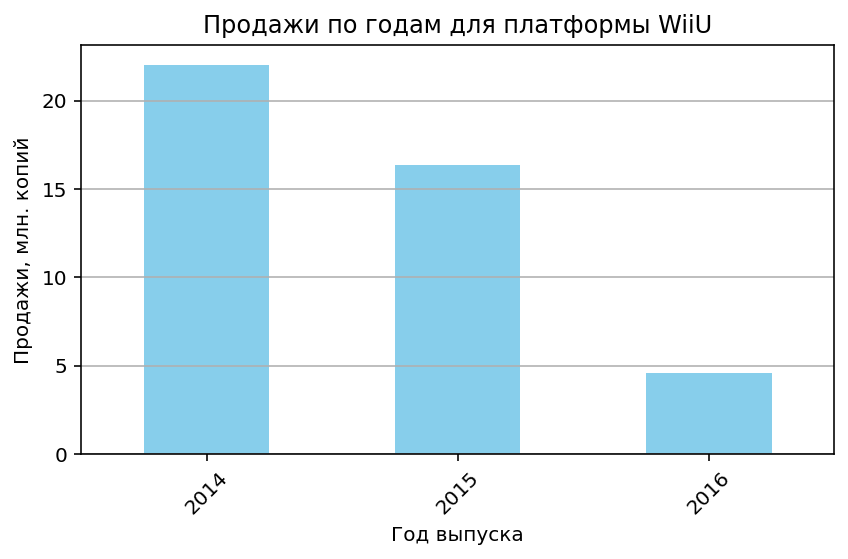

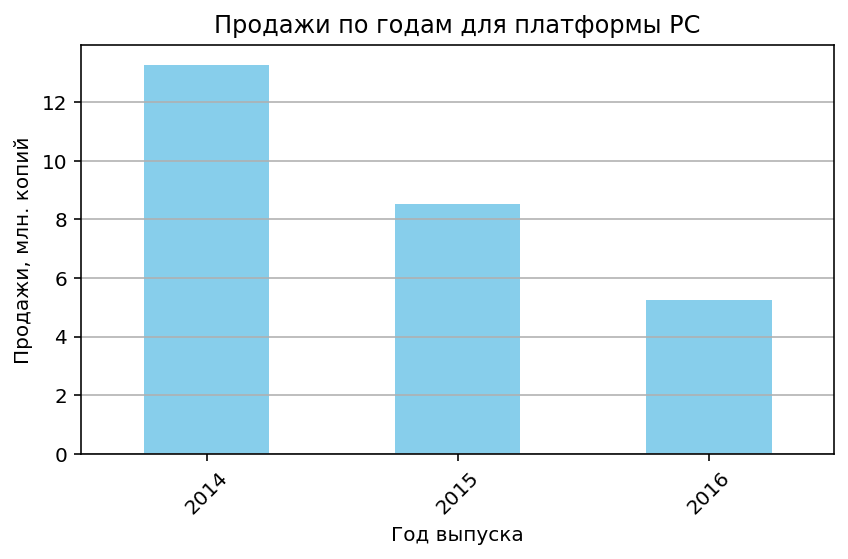

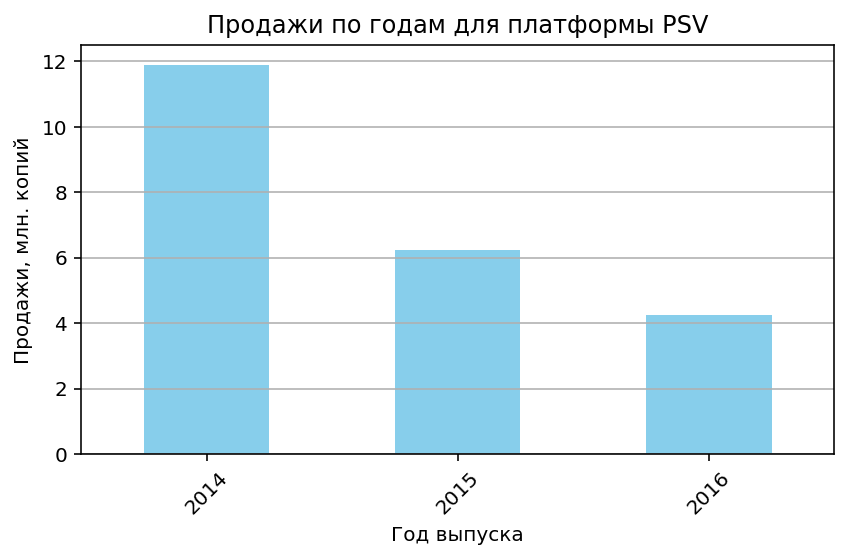

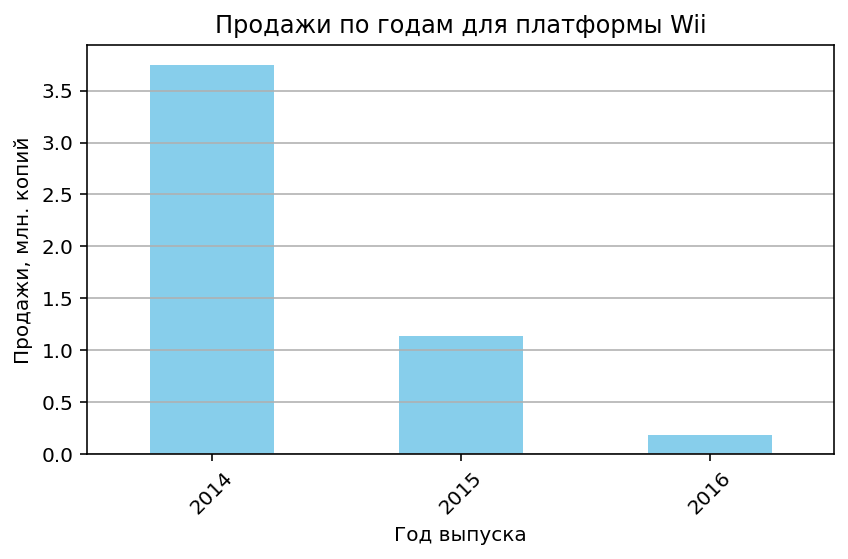

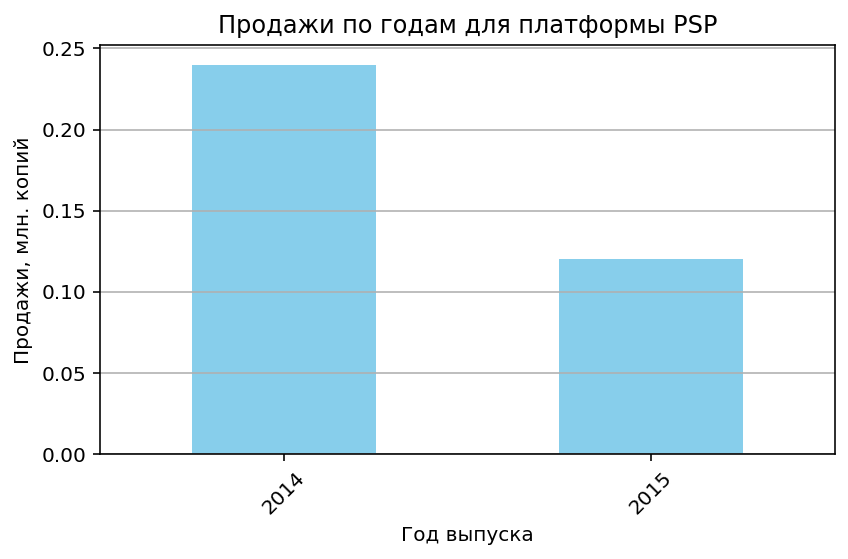

In [46]:
for platform in sales_actual.index:
    platform_data = platforms_actual[platforms_actual["platform"] == platform]
    platform_data.plot(
        x="year_of_release", y="total_sales", kind="bar", legend=False, color="skyblue"
    )
    plt.title(f"Продажи по годам для платформы {platform}")
    plt.xlabel("Год выпуска")
    plt.ylabel("Продажи, млн. копий")
    plt.grid(axis="y")
    plt.xticks(rotation=45)
    plt.tight_layout()  # Улучшает отображение графика
    plt.show()

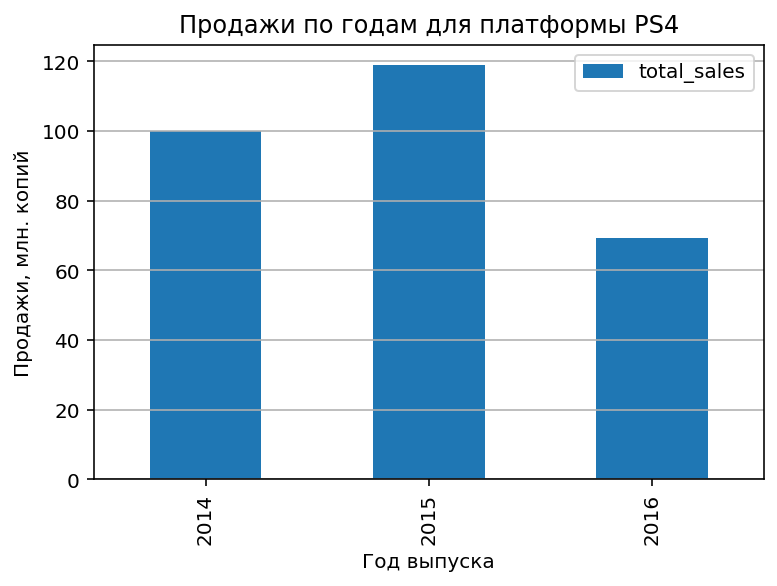

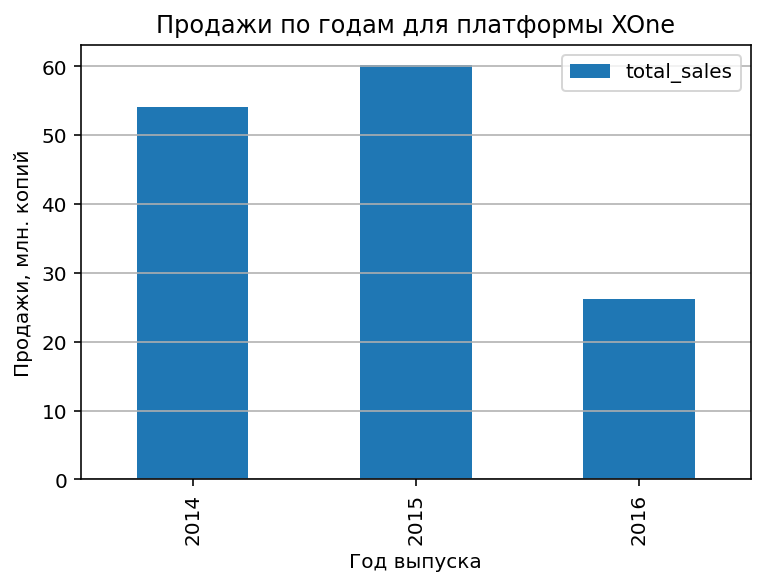

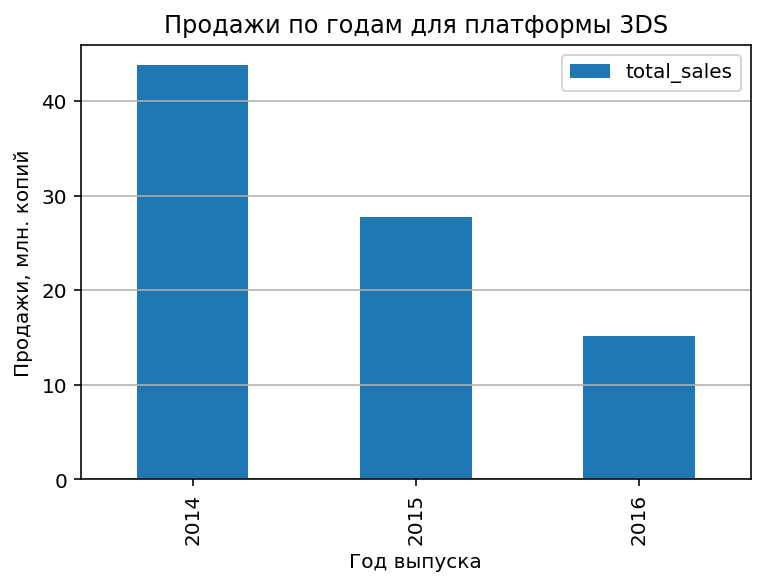

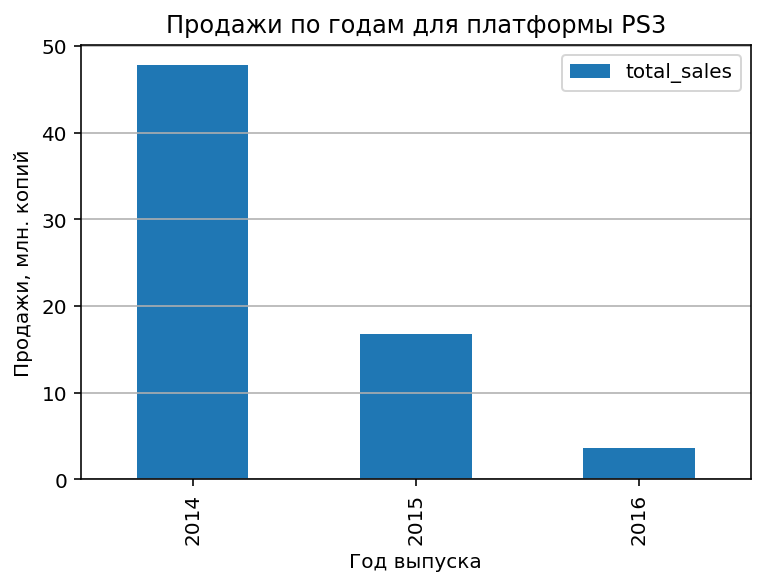

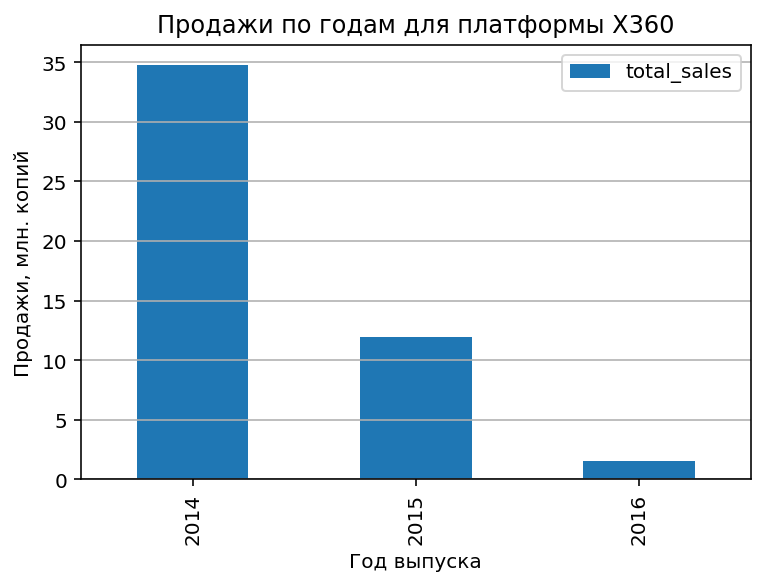

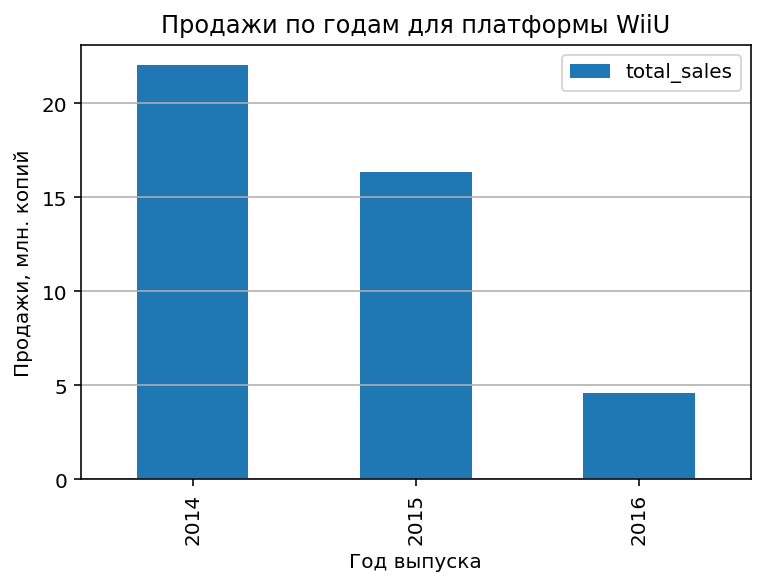

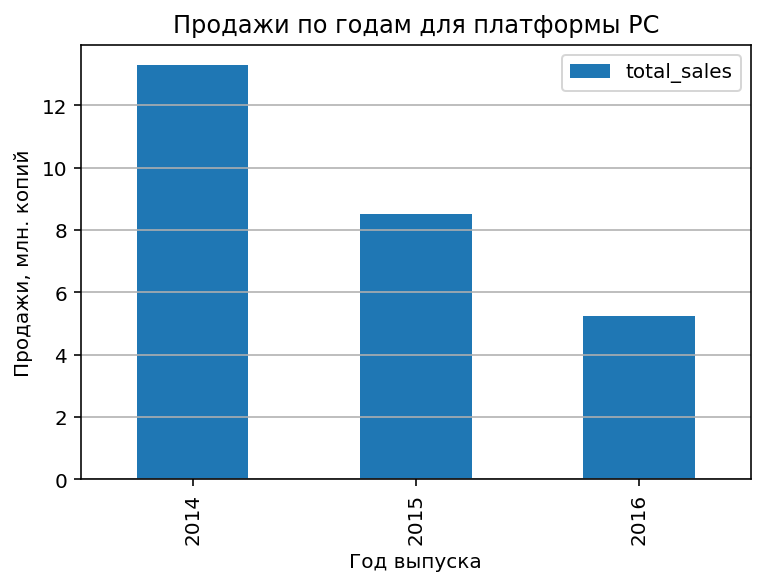

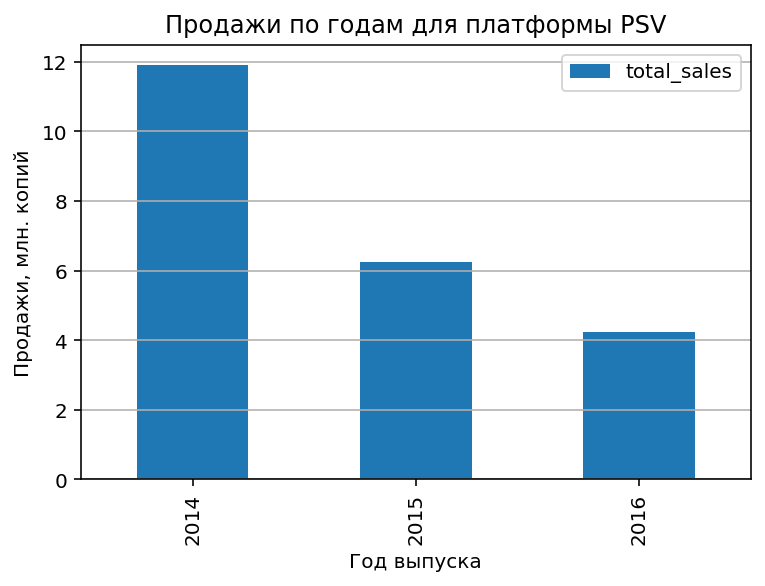

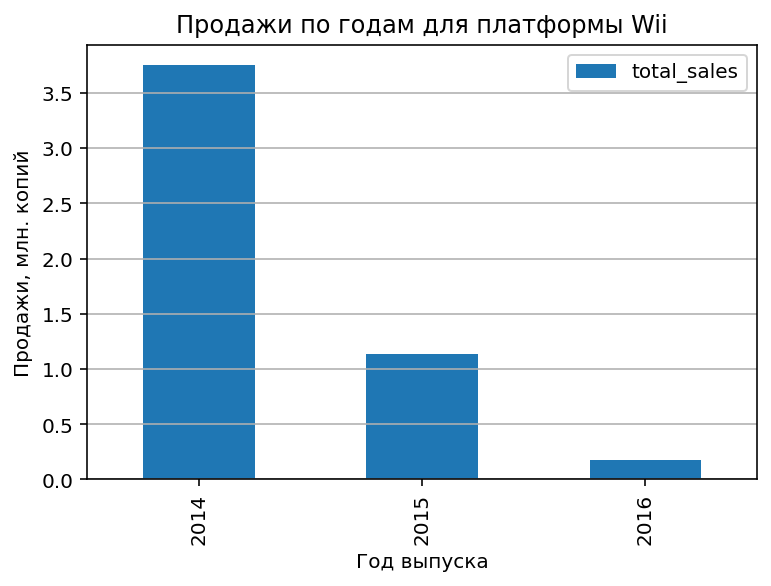

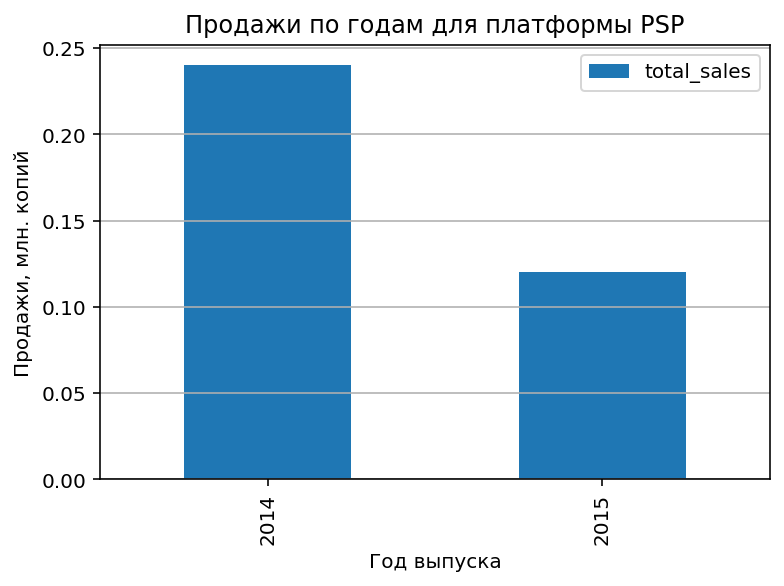

In [47]:
for platform in sales_actual.index:
    (
        df_actual.query("platform == @platform")
        .pivot_table(index="year_of_release", values="total_sales", aggfunc="sum")
        .plot(kind="bar")
    )

    plt.title(f"Продажи по годам для платформы {platform}")
    plt.xlabel("Год выпуска")
    plt.ylabel("Продажи, млн. копий")
    plt.grid(axis="y")

    plt.show()

<span style="color: blue;">**Вопрос для ревьюера:** Не слишком ли громоздкая эта визуализация? сделал двумя способами, но оба мне не очень нравятся <span>

**Вывод**: 
- При исследовании основных платформ за актуальный период мы можем сразу отметить 2 основных платформы XONE и PS4, которые с большим отрывом опережают конкурентов. Интересно, что продажи PS4 по информации из нашего датасета сильно опережают XONE. это может быть связано с тем, что данные о продажах XONE не в полной мере собраны со всех регионов.
- Также мы видим что в 2016 среди всех платформ продаж меньше чем зза предыдущие два года. Это с большой долей веротяности говорит о неполных данных за 2016 год. Желательно эти данные актуализировать, они скорее всего могут немного изменить картину исследования
- Наиболее актуальными платформами на  2017 год являются PS4, XONE и 3DS. Платформы предыдущего поколения будут устаревать, а WiiU также можно назвать перспективной платформой, Так как она опережает PC


#### Глобальные продажи игр в разбивке по платформам.

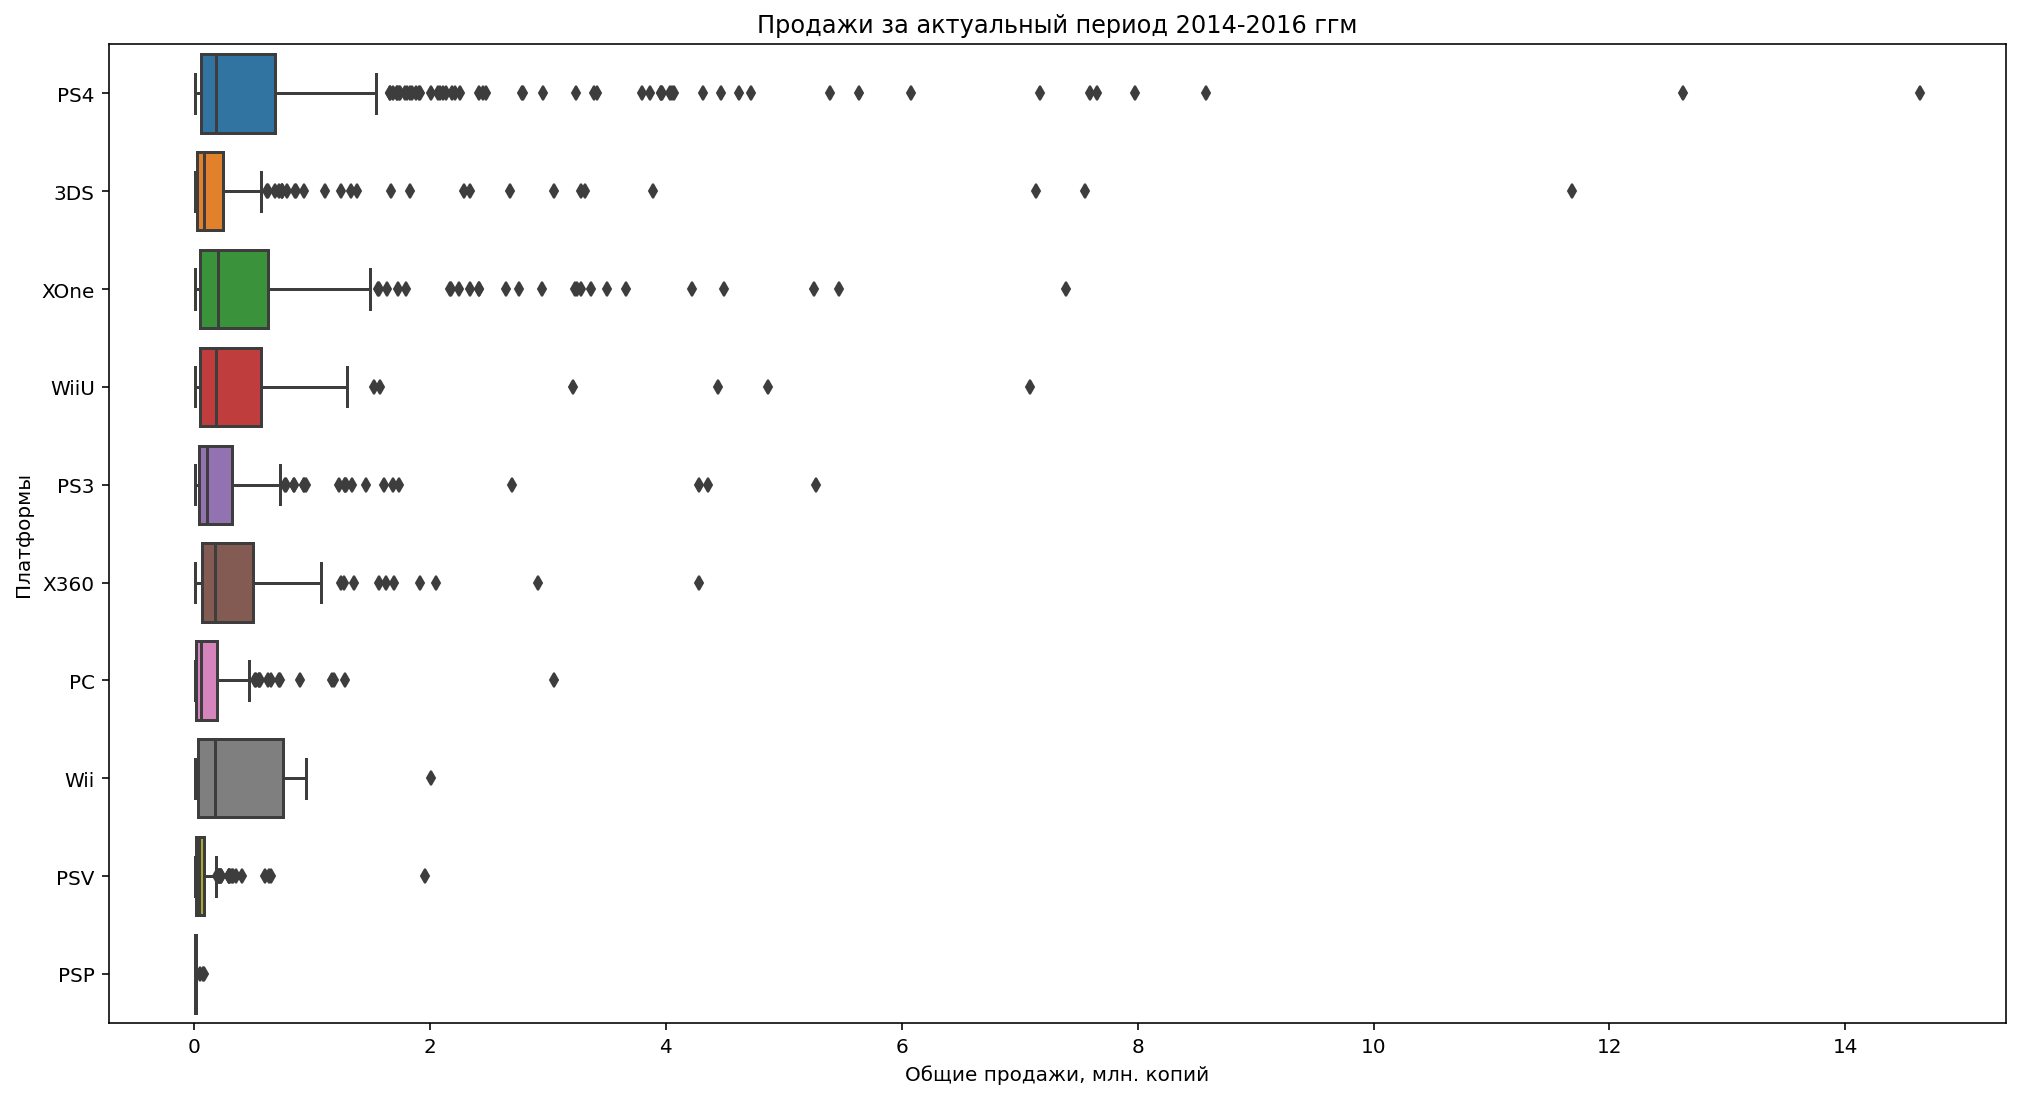

In [51]:
plt.figure(figsize=(17, 9))
sns.boxplot(data=df_actual, x="total_sales", y="platform")
plt.title("Продажи за актуальный период 2014-2016 ггм")
plt.xlabel("Общие продажи, млн. копий")
plt.ylabel("Платформы")

plt.show()

У каждой платформы присутсвуют выбросы, есть даже игры более 10 млн копий. Для более наглядного представления рассмотрим интервал в продаж до 2.5 млн копий, в него попадают все наши платформы включая 1,5IQR

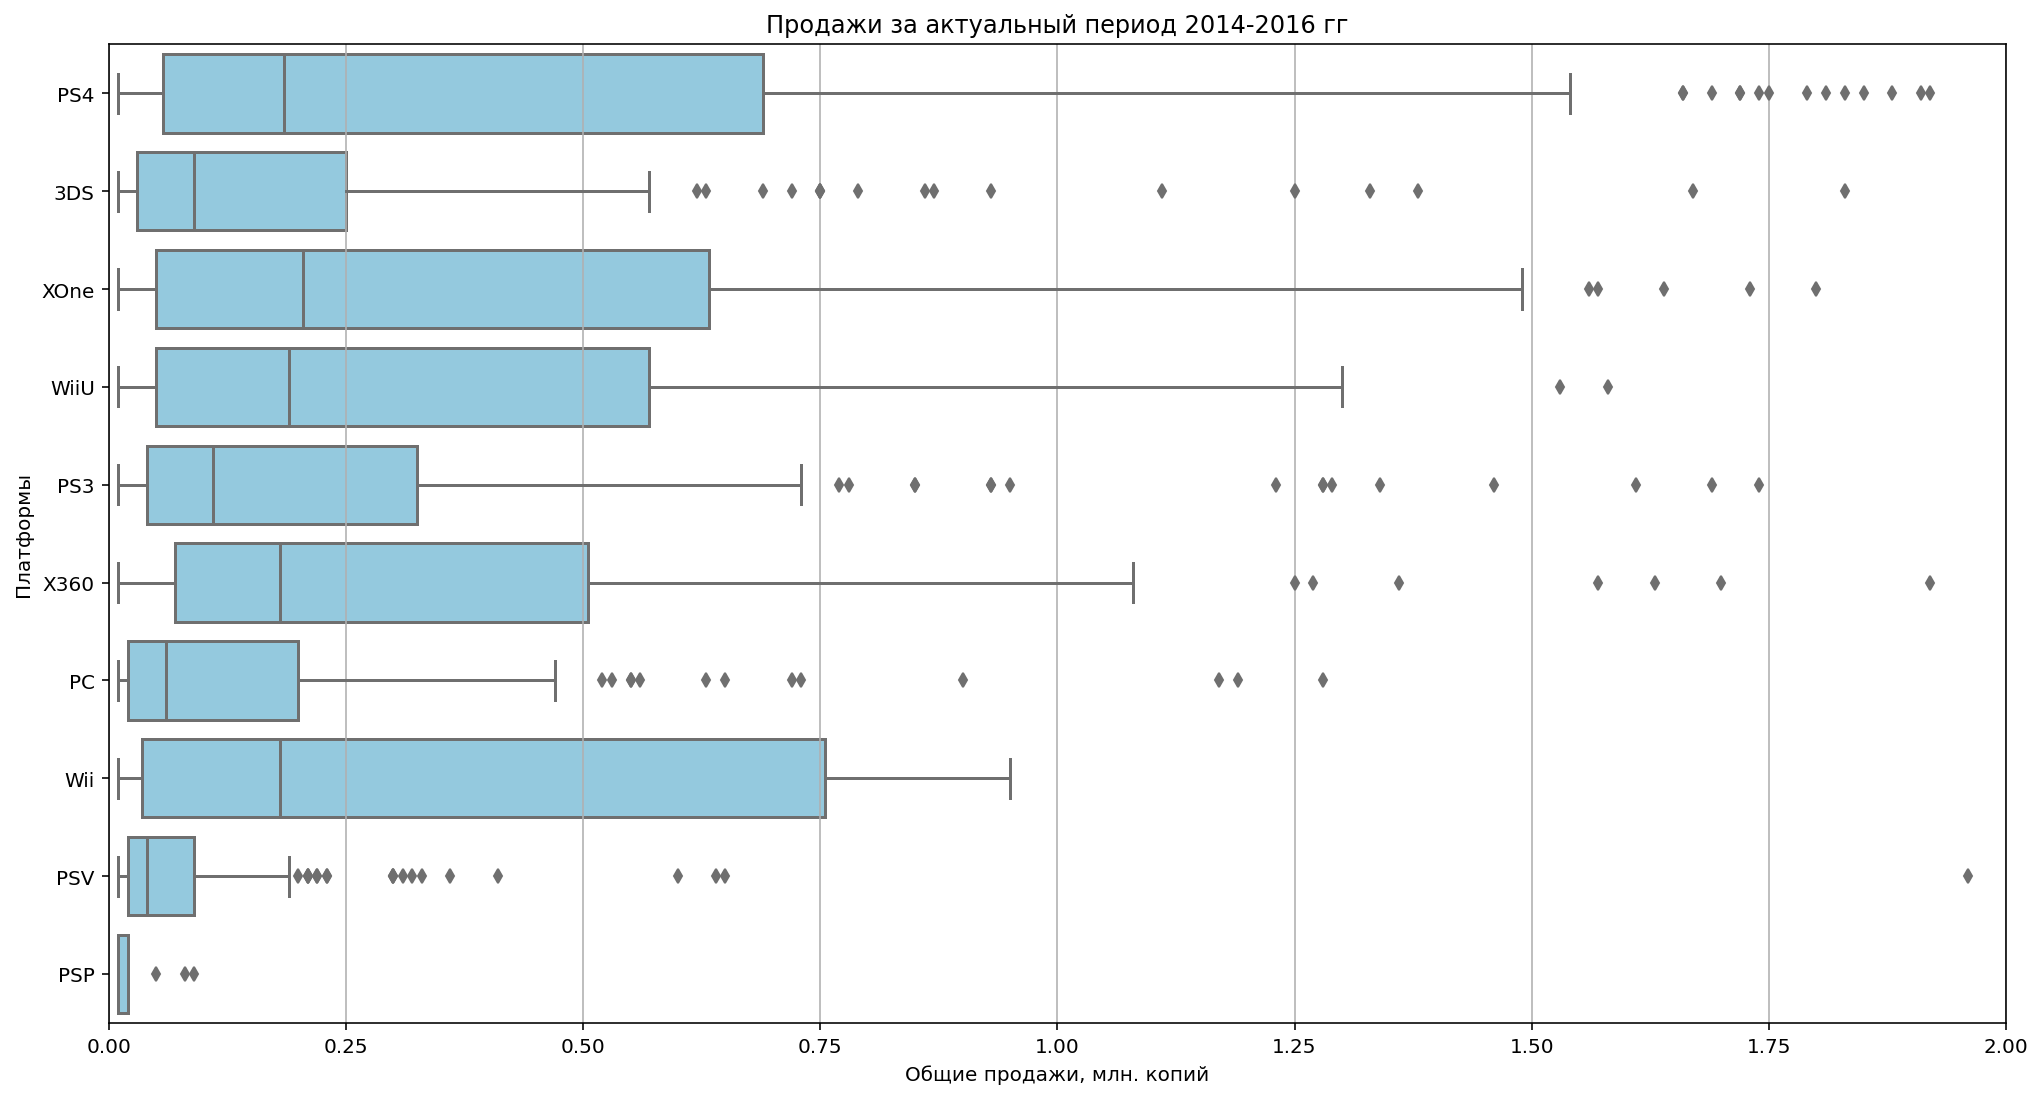

In [64]:
plt.figure(figsize=(17, 9))
sns.boxplot(data=df_actual, x="total_sales", y="platform", color="skyblue")
plt.title("Продажи за актуальный период 2014-2016 гг")
plt.xlabel("Общие продажи, млн. копий")
plt.ylabel("Платформы")
plt.xlim(0, 2)
plt.grid(axis="x")
plt.show()

In [69]:
#проверим средние значения по категориями продаж
means = df_actual.groupby("platform")["total_sales"].mean()
means.sort_values(ascending=False)

platform
PS4    0.77
XOne   0.62
WiiU   0.59
Wii    0.46
X360   0.43
3DS    0.41
PS3    0.31
PC     0.18
PSV    0.08
PSP    0.03
Name: total_sales, dtype: float64

**Вывод:**

- За период 2014-2016 медиана даже самых популярных платформ не превышают 0.25 млн проданных копий.
- среднее для всех платформ значительно смещено в большую сторону. На всех платформах время от времени выходят игры которые продаются миллионами копий. 
- выбросы присуствуют на всех самых популярных консолях, но даже визуально можно сказать что больше всего их на популярных платформах, которые вышли в последние годы. На эти платформы и следует делать ставку в 2017 (PS4, XONE, 3DS)
- несмотря на небольшое количество хитов у приставок Wii и WiiU, стоит отметить что по средним продажам они опережают XBOX360 и 3DS. Консоль Wii завершает свой жизненный цикл, исходя из нашего исследования, а вот WiiU еще может быть актуальной в 2017 году


####  Влияние  на продажи отзывов  пользователей и критиков. 

Для изучения возьмем платформу Play Station 4    
PlayStation 4 (яп. プレイステーション4 Пурэйсутэ:сён Фо:, официальное сокр. PS4) — игровая приставка восьмого поколения, выпускаемая японской компанией Sony. PlayStation 4 входит в семейство игровых приставок PlayStation и была выпущена на смену PlayStation 3 — предыдущей домашней игровой консоли той же компании. Официальный анонс PlayStation 4 состоялся на конференции PlayStation Meeting 2013 в феврале 2013 года, продажи начались в ноябре 2013 года в США, Европе, Южной Америке, России и Австралии и в феврале 2014 года в Японии. Осенью 2016 года Sony выпустила две новые аппаратные версии приставки: PlayStation 4 Slim, обладающую уменьшенными габаритами, и PlayStation 4 Pro, оснащённую более мощными основным и графическим процессором с расчётом на возможность вывода изображения и потокового видео в разрешении 4K.

In [ ]:
# отфильтруем по платформе
ps4_sales = df_actual.query("platform == 'PS4'")[
    ["critic_score", "user_score", "total_sales"]
]

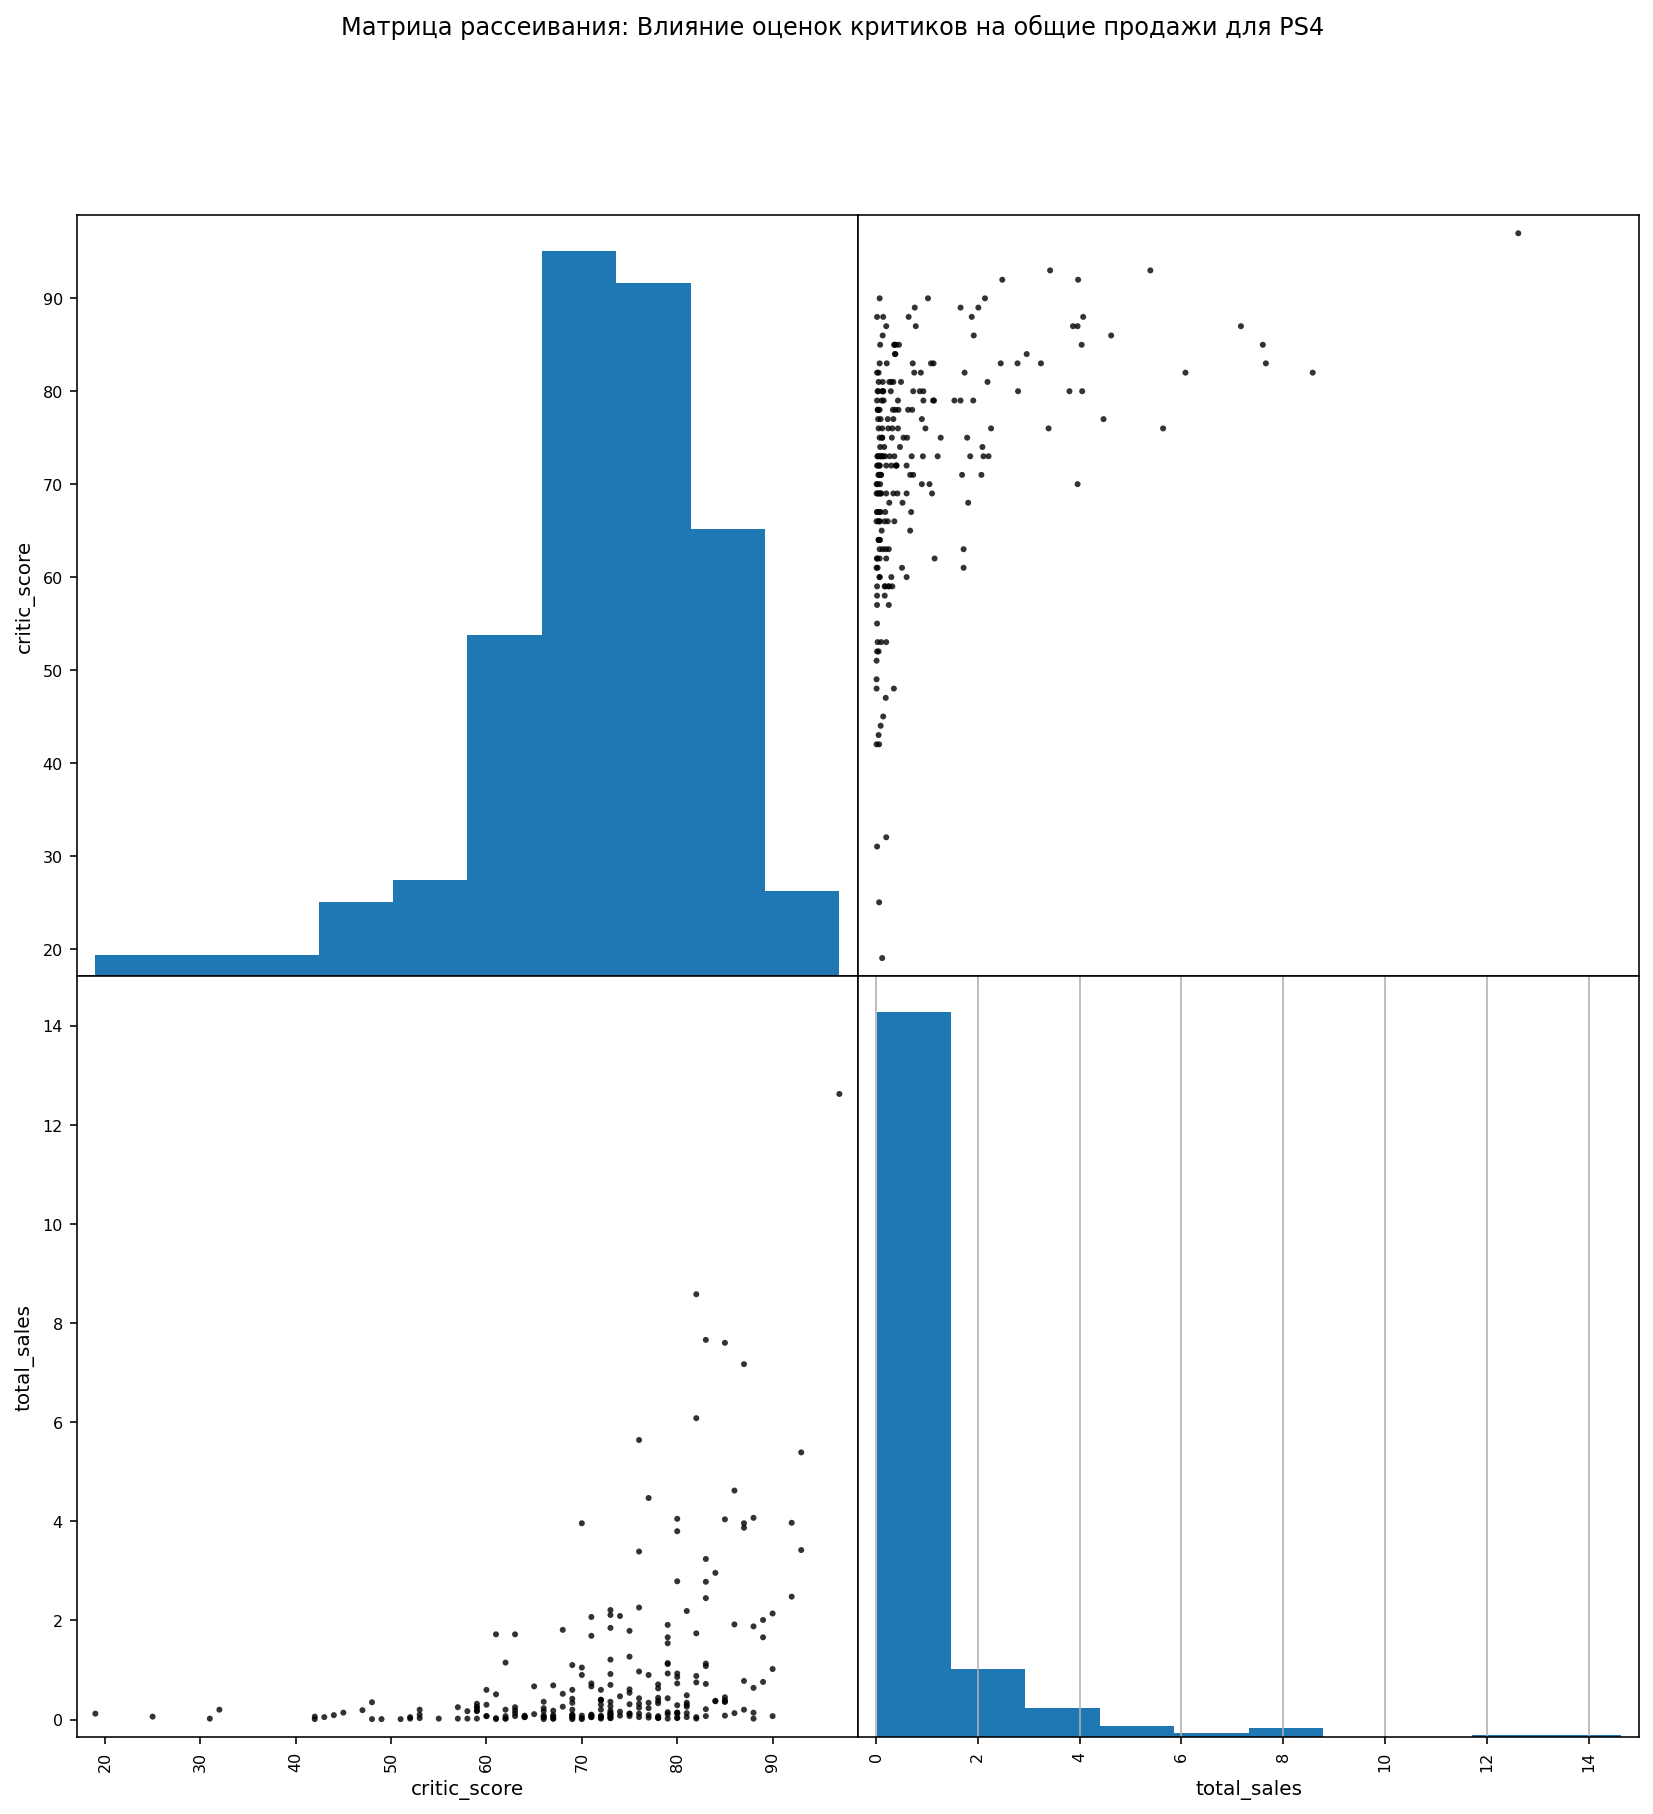

In [119]:
# построим матрицу рассеивания для оценок критиков и продаж
pd.plotting.scatter_matrix(
    ps4_sales[["critic_score", "total_sales"]],
    figsize=(14, 14),
    alpha=0.8,
    color="black",
)
plt.grid(axis="x")
plt.suptitle("Матрица рассеивания: Влияние оценок критиков на общие продажи для PS4")
plt.show()

Оценки критиков в диапазоне 80-90 соответсвуют всплескам в столбце ```total_sales``` до 8-10 млн копий. Самая высокая ценка соответсует рекордным продажам. Мы видим, что оценка критиков  коррелирует с продажами и даже может быть драйвером

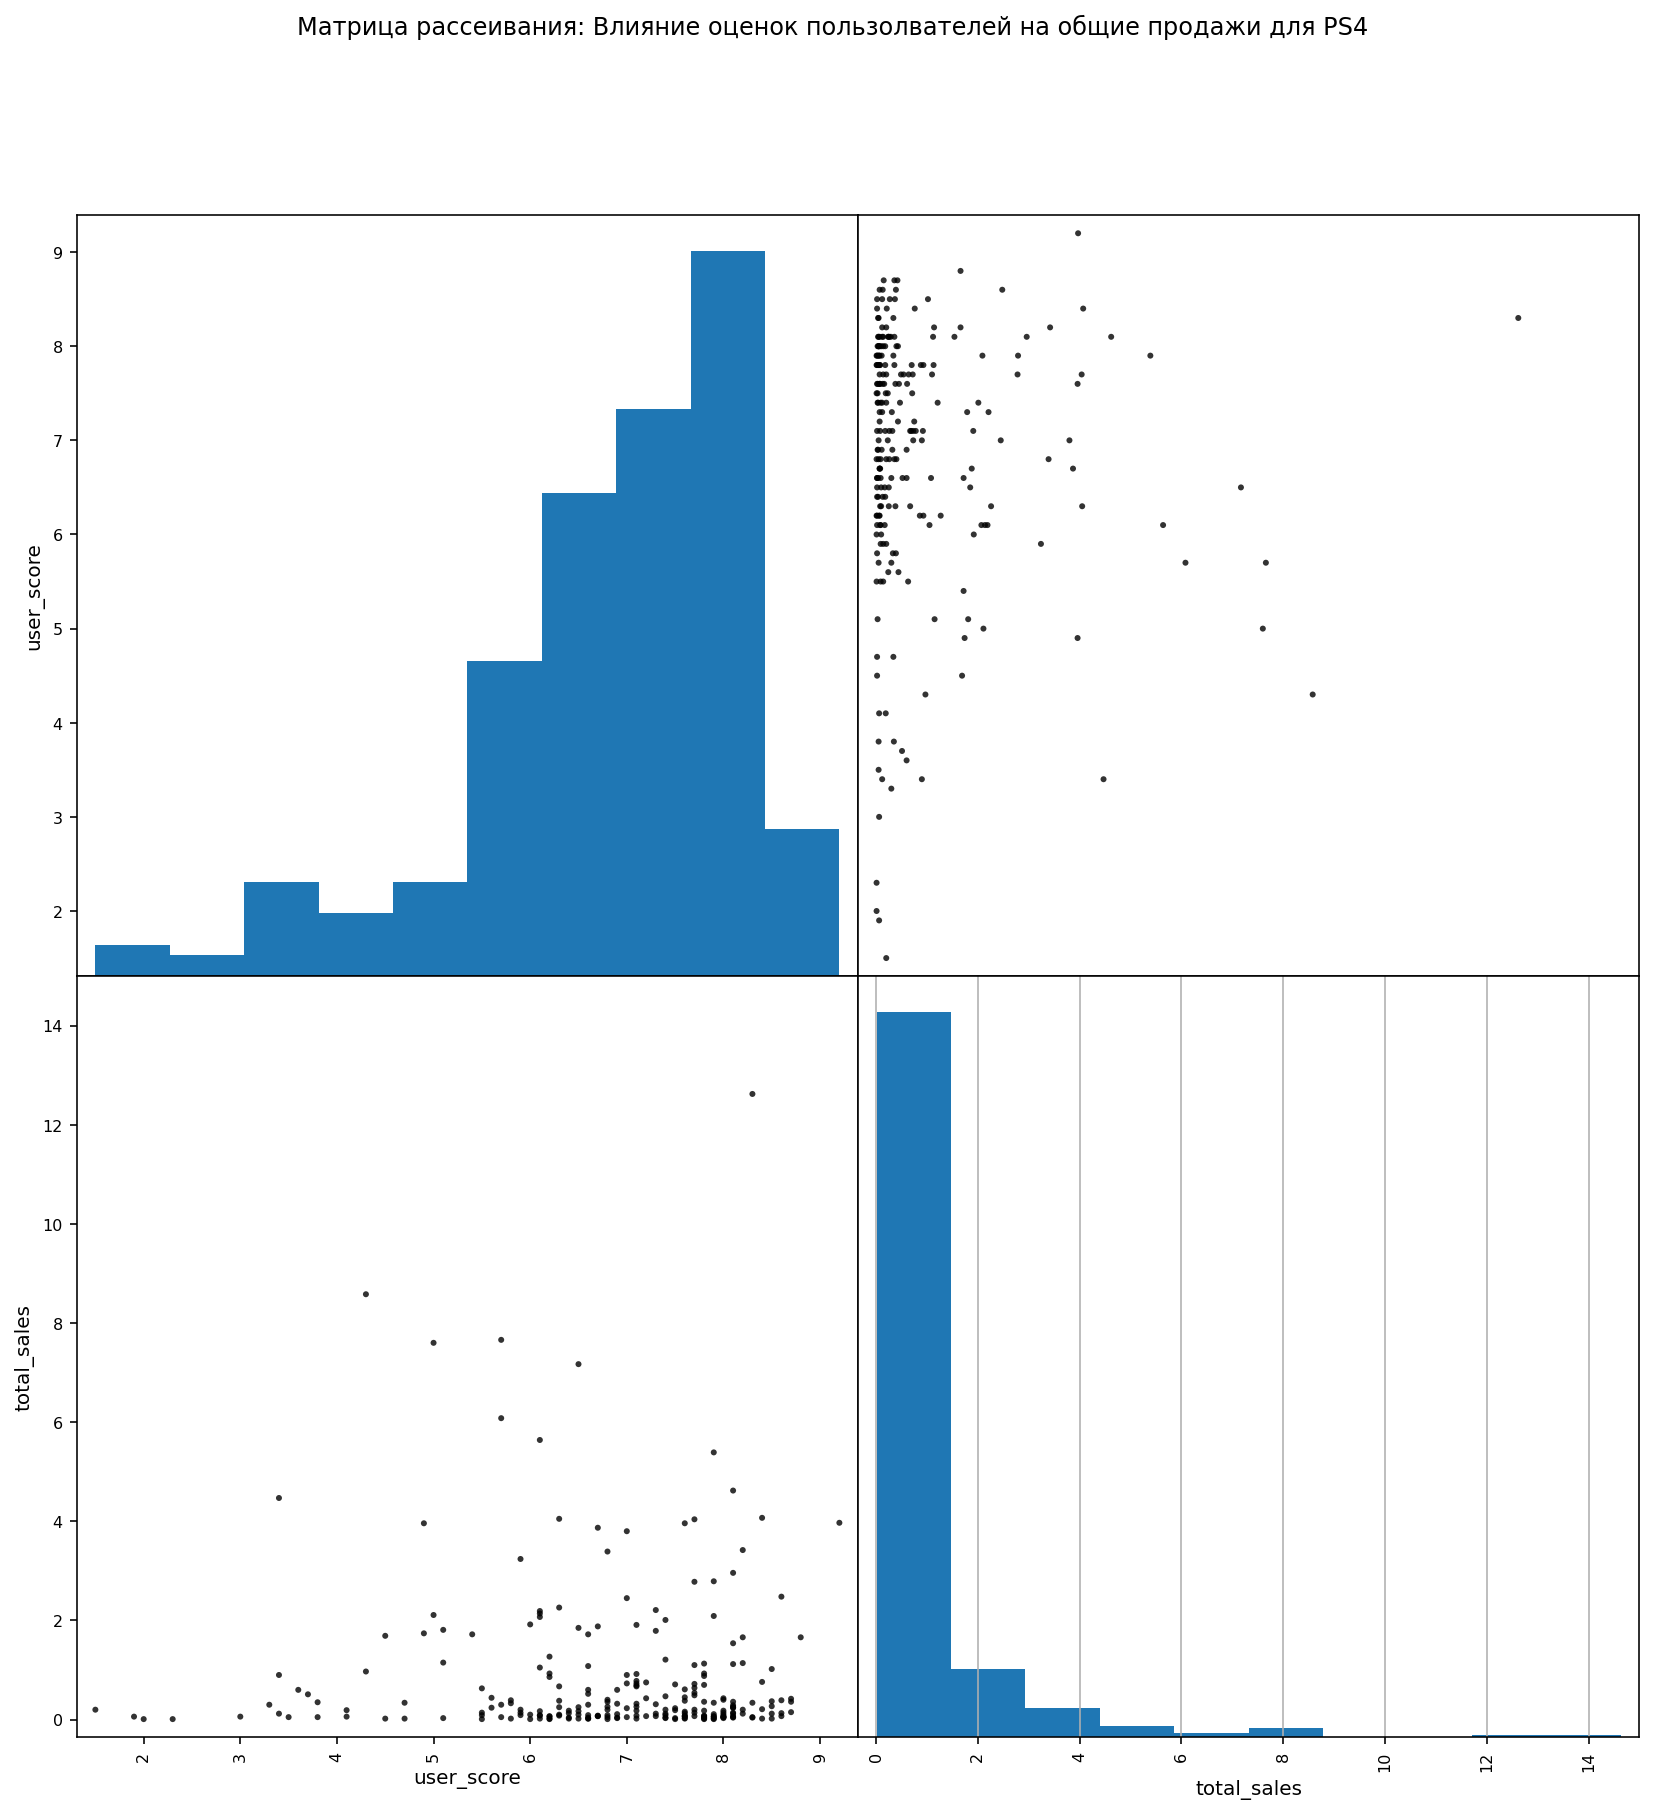

In [144]:
# построим матрицу рассеивания для оценок критиков и продаж
pd.plotting.scatter_matrix(
    ps4_sales[["user_score", "total_sales"]],
    figsize=(14, 14),
    alpha=0.8,
    color="black",
)
plt.grid(axis="x")
plt.suptitle(
    "Матрица рассеивания: Влияние оценок пользолвателей на общие продажи для PS4"
)
plt.show()

Больше всего продаж игр лежит в диапазоне до 2 млн копий, при этом оценки пользователей разнообразно распределены в диапазоне от 5 до 9. и продажи выше 2 млн копий наблюдаются у игр с разными оценками пользователей. Можно утвреждать что они гораздо меньше влияют на продажи чем оценки критиков

In [125]:
ps4_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
total_sales,0.40,-0.04,1.00


Коэффициент корреляции Пирсона измеряет взаимосвязь  количественных переменных и предполагает, что обе переменные имеют нормальное распределение. На его расчет значительное влияние оказывают выбросы, которые присутсвуют в данном исследовании. Рассчитаем корреляция с помощью метода Спирмана, который менее чувствителен к выбросам.

In [132]:
ps4_sales.corr(method="spearman")

,critic_score,user_score,total_sales
critic_score,1.00,0.44,0.50
user_score,0.44,1.00,-0.01
total_sales,0.50,-0.01,1.00


**Вывод:**

    - Оценки критиков находятся в линейной зависимости и наличие корреляции Спирмана 0.5 говорит нам о том что на эти данные стоит ориентироваться при прогнозе продаж на 2017 год.    
    - Оценки пользователей оказывают на продажи гораздо меньшее влияние. Согласно расчету для платформы PS4 - корреляция отсутсвует

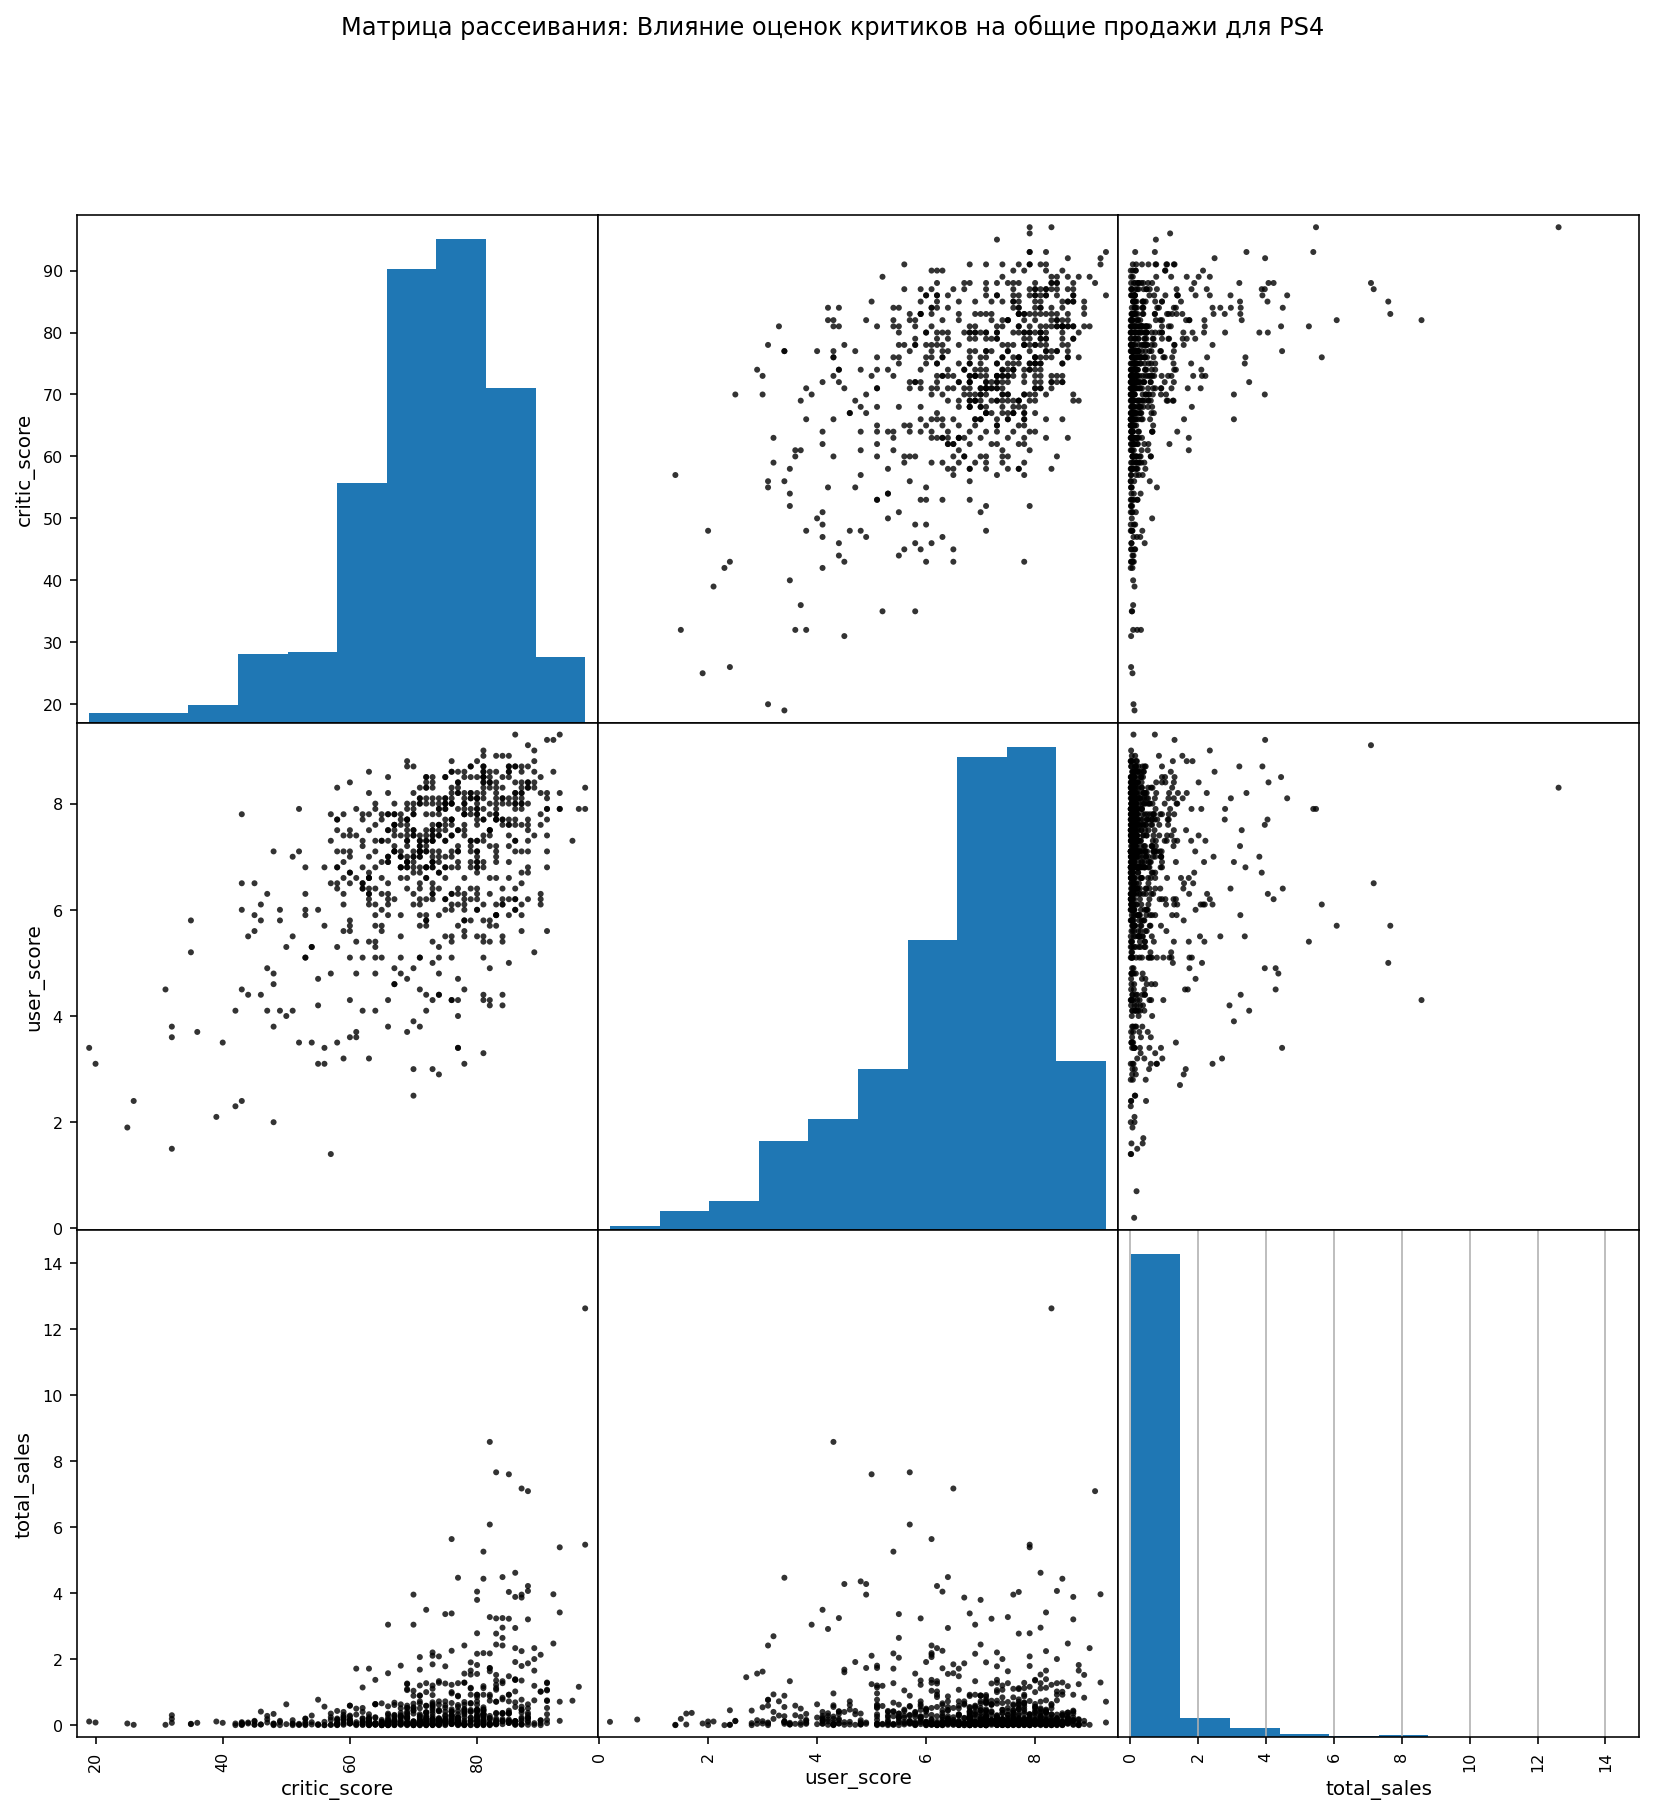

In [145]:
# построим матрицу рассеивания для всех платформ без разбивки
pd.plotting.scatter_matrix(
    df_actual[["critic_score", "user_score", "total_sales"]],
    figsize=(14, 14),
    alpha=0.8,
    color="black",
)
plt.grid(axis="x")
plt.suptitle("Матрица рассеивания: Влияние оценок критиков на общие продажи для PS4")
plt.show()

In [146]:
df_actual[["critic_score", "user_score", "total_sales"]].corr(method="spearman")

,critic_score,user_score,total_sales
critic_score,1.00,0.43,0.41
user_score,0.43,1.00,-0.03
total_sales,0.41,-0.03,1.00


**Вывод:** 
- похожим образом выглядит взаимосвязь продаж для платформ без разбивки - они имеют взаимосвязь с оценками критиков, это подтверждает корреляция между столбцами `critic_score` и `total_sales` 0.41


#### Распределение игр по жанрам. Зависимость продаж игры от жанра

In [155]:
genre_sales = df_actual.groupby("genre")["total_sales"].sum().reset_index()
genre_sales.sort_values(by="total_sales", ascending=False)

,genre,total_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


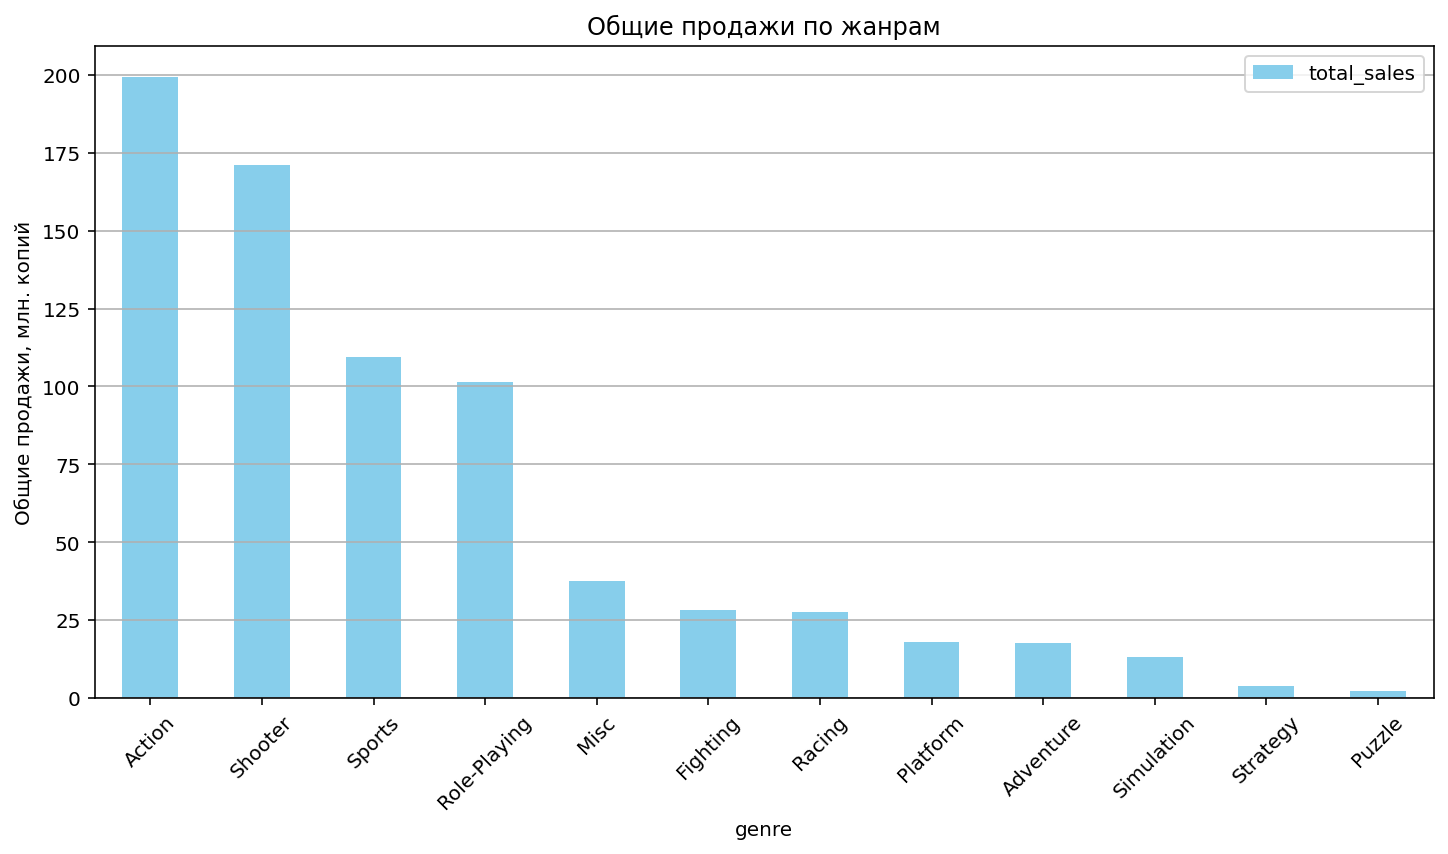

In [162]:
genre_sales.sort_values(by="total_sales", ascending=False).plot(
    kind="bar", x="genre", y="total_sales", figsize=(12, 6), color="skyblue"
)
plt.title("Общие продажи по жанрам")
plt.ylabel("Общие продажи, млн. копий")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()